This notebook is for creating fiber strain analysis figures for paper 1

__To do__

* Create a more standardised way of creating following plots for each fibre architecture:
    * Scatter plots comparing mean and std
        * Include RMSE
    * Boxplots comparing mean and std
        * Include p values
    * Make it easy to plot for all fiber strain components: f1 and f2!
    

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns
import numpy as np
from hrs_23_figures import *
import pyvista as pv
from scipy import stats
from sklearn.metrics import mean_squared_error

all_cases = af_cases + nonaf_cases

In [9]:
fib_arch_list = ["endo_1", "endo_2", "endo_3", "endo_4", "endo_5", "endo_6", 
                 "endo_7", "endo_avg", "endo_l", "endo_rand"]
components = ['f1', 'f2']
regions = ["roof", "sept", "lat", "ant", "post"]

## Load Global statistics

* Global mean, std, median
* Excluding top 1% percentile of strains

In [ ]:
## Using percentiles
## First fig:
## How does global spread of strains compare between areaitudinal
## fiber atlas and rule-based fibers? 

frame=4
upper_percent=99
# fibre_arch="endo_avg"

## Following arrays contain global strain standard deviation, mean and median for all cases
## Stored for all architectures and rule-based fibers

## N_cases, N_fibs, N_component
fib_std=np.zeros((len(all_cases),9,2))
fib_mean=np.zeros((len(all_cases),9,2))
fib_med=np.zeros((len(all_cases),9,2))

area_std=np.zeros((len(all_cases),))
area_mean=np.zeros((len(all_cases),))
area_med=np.zeros((len(all_cases),))

fib_arch_list = ["endo_1", "endo_2", "endo_3", "endo_4", "endo_5", "endo_6", "endo_7", "endo_avg", "endo_l"]
components = ['f1', 'f2']

## Bounds for percntile exclusion
## N_Cases, N_fibs, N_component, LowerUpperBounds
data_bounds = np.zeros((len(all_cases), len(fib_arch_list), 2, 2))

for i in range(0, len(all_cases)):
    case=all_cases[i]
    
    for j in range(0, len(fib_arch_list)):
        
        for k in range(0, len(components)):
            component=components[k]
        
            fib_data = retrieve_fibre_strain_all_data(case, fib_arch_list[j], frame)[component]
#         data_bounds = np.percentile(fib_data, [0, upper_percent])

            data_bounds[i,j,k,:] = np.percentile(fib_data, [0, upper_percent])

            condition = fib_data[:] > data_bounds[i,j,k,1]

            fib_data[condition]=np.nan

            fib_std[i, j, k] = np.nanstd(fib_data)
            fib_mean[i, j, k] = np.nanmean(fib_data)
            fib_med[i, j, k] = np.nanmedian(fib_data)

    area_data = retrieve_area_strain_all_data(case, "area", frame)['Area']

    area_data_bounds = np.percentile(area_data, [0, upper_percent])
    condition_l = area_data[:] > area_data_bounds[1]
    area_data[condition_l]=np.nan

    area_std[i] = np.nanstd(area_data)
    area_mean[i] = np.nanmean(area_data)
    area_med[i] = np.nanmedian(area_data)
    
#     print(case, "\t", std, "\t", std_l)

In [ ]:
## Load rand fib results

## Using percentiles
## First fig:
## How does global spread of strains compare between areaitudinal
## fiber atlas and rule-based fibers? 

frame=4
upper_percent=99
# fibre_arch="endo_avg"

## Following arrays contain global strain standard deviation, mean and median for all cases
## Stored for all architectures and rule-based fibers

fib_arch_list = ["rand_fib"]
components = ['f1', 'f2']

## N_cases, N_component
fib_std=np.zeros((len(all_cases), len(fib_arch_list),2))
fib_mean=np.zeros((len(all_cases), len(fib_arch_list),2))
fib_med=np.zeros((len(all_cases), len(fib_arch_list),2))

area_std=np.zeros((len(all_cases),))
area_mean=np.zeros((len(all_cases),))
area_med=np.zeros((len(all_cases),))

## Bounds for percntile exclusion
## N_Cases, N_arch, N_component, LowerUpperBounds
data_bounds = np.zeros((len(all_cases), len(fib_arch_list), 2, 2))

for i in range(0, len(all_cases)):
    case=all_cases[i]
    
    for j in range(0, len(fib_arch_list)):
        
        for k in range(0, len(components)):
            component=components[k]
        
            fib_data = retrieve_fibre_strain_all_data(case, fib_arch_list[j], frame)[component]
#         data_bounds = np.percentile(fib_data, [0, upper_percent])

            data_bounds[i,j,k,:] = np.percentile(fib_data, [0, upper_percent])

            condition = fib_data[:] > data_bounds[i,j,k,1]

            fib_data[condition]=np.nan

            fib_std[i, j, k] = np.nanstd(fib_data)
            fib_mean[i, j, k] = np.nanmean(fib_data)
            fib_med[i, j, k] = np.nanmedian(fib_data)

    area_data = retrieve_area_strain_all_data(case, "area", frame)['Area']

    area_data_bounds = np.percentile(area_data, [0, upper_percent])
    condition_l = area_data[:] > area_data_bounds[1]
    area_data[condition_l]=np.nan

    area_std[i] = np.nanstd(area_data)
    area_mean[i] = np.nanmean(area_data)
    area_med[i] = np.nanmedian(area_data)
    
#     print(case, "\t", std, "\t", std_l)

In [ ]:
## Save rand fib strains

np.save("/home/csi20/Dropbox/phd/Documents/P1/figures/fiber_strains/global_strain_statistics/fib_std-case_randfib_comp.npy", fib_std)
np.save("/home/csi20/Dropbox/phd/Documents/P1/figures/fiber_strains/global_strain_statistics/fib_mean-case_randfib_comp.npy", fib_mean)
np.save("/home/csi20/Dropbox/phd/Documents/P1/figures/fiber_strains/global_strain_statistics/fib_med-case_randfib_comp.npy", fib_med)


In [3]:
np.sum(area_data.isna())

1864

## Save Global statistics

In [6]:
fib_std.shape

(29, 9, 2)

In [9]:
np.save?

In [11]:
## Save fiber strains' statistics

np.save("/home/csi20/Dropbox/phd/Documents/P1/figures/fiber_strains/fib_std-case_arch_comp.npy", fib_std)
np.save("/home/csi20/Dropbox/phd/Documents/P1/figures/fiber_strains/fib_mean-case_arch_comp.npy", fib_mean)
np.save("/home/csi20/Dropbox/phd/Documents/P1/figures/fiber_strains/fib_med-case_arch_comp.npy", fib_med)

## Save area strains' statistics

np.save("/home/csi20/Dropbox/phd/Documents/P1/figures/fiber_strains/area_std-case.npy", area_std)
np.save("/home/csi20/Dropbox/phd/Documents/P1/figures/fiber_strains/area_mean-case.npy", area_mean)
np.save("/home/csi20/Dropbox/phd/Documents/P1/figures/fiber_strains/area_med-case.npy", area_med)



## Load Regional statistics
* Regional mean, std, median
* Excluding top 1% from global strain data percentiles

In [12]:
data_bounds.shape

(29, 9, 2, 2)

In [13]:
## Regionally 

frame=4
upper_percent=99
# fib_arch="endo_avg"
fibre_arch_list = ["endo_1", "endo_2", "endo_3", "endo_4", "endo_5", "endo_6", "endo_7", "endo_avg", "endo_l"]

## N_cases, N_regions, N_fib_arch, N_components

fib_reg_std=np.zeros((len(all_cases),5,len(fibre_arch_list), 2))
fib_reg_mean=np.zeros((len(all_cases),5,len(fibre_arch_list), 2))
fib_reg_med=np.zeros((len(all_cases),5,len(fibre_arch_list), 2))

area_reg_std=np.zeros((len(all_cases),5))
area_reg_mean=np.zeros((len(all_cases),5))
area_reg_med=np.zeros((len(all_cases),5))

p_val_std=np.zeros((5,))

components = ['f1', 'f2']
regions = ["roof", "sept", "lat", "ant", "post"]
# fibre_arch_list = ["endo_avg", "endo_l"]

for i in range(0, len(all_cases)):
    case=all_cases[i]
    
    for region_j in range(0,len(regions)):
        region = regions[region_j]

        for fib_k in range(0,len(fibre_arch_list)):
            fib_arch = fibre_arch_list[fib_k]
            
            for l in range(0, len(components)):
                component=components[l]
    
                ## All regional cell data
                ## Fibres
                data = retrieve_fibre_strain_region(case, fib_arch, frame, region_j+1)[component]
    #             data_bounds = np.percentile(data, [0, upper_percent])
                condition = data[:] > data_bounds[i, fib_k, l, 1]
                data[condition]=np.nan
            
                fib_reg_std[i, region_j, fib_k, l]=np.nanstd(data)
                fib_reg_mean[i, region_j, fib_k, l]=np.nanmean(data)
                fib_reg_med[i, region_j, fib_k, l]=np.nanmedian(data)

        ## All regional cell data
        ## area
        area_data = retrieve_area_strain_region(case, 'area', frame, region_j+1)['Area']
        
        area_data_bounds = np.percentile(area_data, [0, upper_percent])
        condition_l = area_data[:] > area_data_bounds[1]
        area_data[condition_l]=np.nan
        
        area_reg_std[i, region_j]=np.nanstd(area_data)
        area_reg_mean[i, region_j]=np.nanmean(area_data)
        area_reg_med[i, region_j]=np.nanmedian(area_data)
        
#         print(case, "\t", std, "\t", std_l)

# for i in range(0, len(regions)):
#     p_val_std[i] = stats.ttest_ind(fib_std[:, i], area_std[:, i])[-1]

#     print(p_val_std[i])
    
## More pronounced differences between spread of strain values
## area seems to have more homogeneous strains except for the lateral wall

In [14]:
## Save regional strain statistics

directory="/home/csi20/Dropbox/phd/Documents/P1/figures/fiber_strains/regional_strain_statistics"

np.save(f"{directory}/fib_std-case-region-arch-comp.npy", fib_reg_std)
np.save(f"{directory}/fib_mean-case-region-arch-comp.npy", fib_reg_mean)
np.save(f"{directory}/fib_med-case-region-arch-comp.npy", fib_reg_med)

np.save(f"{directory}/area_std-case-region.npy", area_reg_std)
np.save(f"{directory}/area_mean-case-region.npy", area_reg_mean)
np.save(f"{directory}/area_med-case-region.npy", area_reg_med)

In [210]:
## Load regional stats for rand fib 

frame=4
upper_percent=99
# fib_arch="endo_avg"
fibre_arch_list = ["rand_fib"]

## N_cases, N_regions, N_fib_arch, N_components

fib_reg_std=np.zeros((len(all_cases),5,len(fibre_arch_list), 2))
fib_reg_mean=np.zeros((len(all_cases),5,len(fibre_arch_list), 2))
fib_reg_med=np.zeros((len(all_cases),5,len(fibre_arch_list), 2))

area_reg_std=np.zeros((len(all_cases),5))
area_reg_mean=np.zeros((len(all_cases),5))
area_reg_med=np.zeros((len(all_cases),5))

p_val_std=np.zeros((5,))

components = ['f1', 'f2']
regions = ["roof", "sept", "lat", "ant", "post"]
# fibre_arch_list = ["endo_avg", "endo_l"]

for i in range(0, len(all_cases)):
    case=all_cases[i]
    
    for region_j in range(0,len(regions)):
        region = regions[region_j]

        for fib_k in range(0,len(fibre_arch_list)):
            fib_arch = fibre_arch_list[fib_k]
            
            for l in range(0, len(components)):
                component=components[l]
    
                ## All regional cell data
                ## Fibres
                data = retrieve_fibre_strain_region(case, fib_arch, frame, region_j+1)[component]
    #             data_bounds = np.percentile(data, [0, upper_percent])
                condition = data[:] > data_bounds[i, fib_k, l, 1]
                data[condition]=np.nan
            
                fib_reg_std[i, region_j, fib_k, l]=np.nanstd(data)
                fib_reg_mean[i, region_j, fib_k, l]=np.nanmean(data)
                fib_reg_med[i, region_j, fib_k, l]=np.nanmedian(data)

        ## All regional cell data
        ## area
        area_data = retrieve_area_strain_region(case, 'area', frame, region_j+1)['Area']
        
        area_data_bounds = np.percentile(area_data, [0, upper_percent])
        condition_l = area_data[:] > area_data_bounds[1]
        area_data[condition_l]=np.nan
        
        area_reg_std[i, region_j]=np.nanstd(area_data)
        area_reg_mean[i, region_j]=np.nanmean(area_data)
        area_reg_med[i, region_j]=np.nanmedian(area_data)
        
#         print(case, "\t", std, "\t", std_l)

# for i in range(0, len(regions)):
#     p_val_std[i] = stats.ttest_ind(fib_std[:, i], area_std[:, i])[-1]

#     print(p_val_std[i])
    
## More pronounced differences between spread of strain values
## area seems to have more homogeneous strains except for the lateral wall

In [211]:
## Save rand fib regional strain statistics

directory="/home/csi20/Dropbox/phd/Documents/P1/figures/fiber_strains/regional_strain_statistics"

np.save(f"{directory}/fib_std-case-region-rand_fib-comp.npy", fib_reg_std)
np.save(f"{directory}/fib_mean-case-region-rand_fib-comp.npy", fib_reg_mean)
np.save(f"{directory}/fib_med-case-region-rand_fib-comp.npy", fib_reg_med)

## Loading Saved Data

In [10]:
## Load final global stats data

project_dir = "/home/csi20/Dropbox/phd/Documents/P1/figures/fiber_strains"

## Load global stats
fib_std = np.load(f"{project_dir}/global_strain_statistics/fib_std-case_arch_comp.npy")
fib_mean = np.load(f"{project_dir}/global_strain_statistics/fib_mean-case_arch_comp.npy")
fib_med = np.load(f"{project_dir}/global_strain_statistics/fib_med-case_arch_comp.npy")

area_std = np.load(f"{project_dir}/global_strain_statistics/area_std-case.npy")
area_mean = np.load(f"{project_dir}/global_strain_statistics/area_mean-case.npy")
area_med = np.load(f"{project_dir}/global_strain_statistics/area_med-case.npy")

randfib_std = np.load(f"{project_dir}/global_strain_statistics/fib_std-case_randfib_comp.npy")
randfib_mean = np.load(f"{project_dir}/global_strain_statistics/fib_mean-case_randfib_comp.npy")
randfib_med = np.load(f"{project_dir}/global_strain_statistics/fib_med-case_randfib_comp.npy")

## Load regional stats
fib_reg_std = np.load(f"{project_dir}/regional_strain_statistics/fib_std-case-region-arch-comp.npy")
fib_reg_mean = np.load(f"{project_dir}/regional_strain_statistics/fib_mean-case-region-arch-comp.npy")
fib_reg_med = np.load(f"{project_dir}/regional_strain_statistics/fib_med-case-region-arch-comp.npy")

area_reg_std = np.load(f"{project_dir}/regional_strain_statistics/area_std-case-region.npy")
area_reg_mean = np.load(f"{project_dir}/regional_strain_statistics/area_mean-case-region.npy")
area_reg_med = np.load(f"{project_dir}/regional_strain_statistics/area_med-case-region.npy")

randfib_reg_std = np.load(f"{project_dir}/regional_strain_statistics/fib_std-case-region-rand_fib-comp.npy")
randfib_reg_mean = np.load(f"{project_dir}/regional_strain_statistics/fib_mean-case-region-rand_fib-comp.npy")
randfib_reg_med = np.load(f"{project_dir}/regional_strain_statistics/fib_med-case-region-rand_fib-comp.npy")

In [30]:
## Make saved data into nice shape by combining randfib into original arrays
## This essentially makes randfib data another fiber architecure, "endo_rand"


fib_std = np.concatenate((fib_std, randfib_std), axis=1)
fib_mean = np.concatenate((fib_mean, randfib_mean), axis=1)
fib_med = np.concatenate((fib_med, randfib_med), axis=1)

In [71]:
fib_reg_std = np.concatenate((fib_reg_std, randfib_reg_std), axis=2)
fib_reg_mean = np.concatenate((fib_reg_mean, randfib_reg_mean), axis=2)
fib_reg_med = np.concatenate((fib_reg_med, randfib_reg_med), axis=2)

In [72]:
fib_reg_std.shape

(29, 5, 10, 2)

# STD Analysis

## Area vs Fiber and Cross Fiber strains

In [31]:
fib_arch_list

['endo_1',
 'endo_2',
 'endo_3',
 'endo_4',
 'endo_5',
 'endo_6',
 'endo_7',
 'endo_avg',
 'endo_l',
 'endo_rand']

In [34]:
## Calculate pearson r coeff between area and DTMRI fibs
## Calculate rmse

arch_ind = -3
print("Shwoing stats for arch: ", fib_arch_list[arch_ind])

pearsonr_glob = stats.pearsonr(fib_std[:, arch_ind, 0], area_std[:])
pearsonr_reg = np.zeros((5,))

RMSE_glob = mean_squared_error(fib_std[:, arch_ind, 0], area_std[:], 
                               squared=False)
RMSE_reg = np.zeros((5,))

print(f"Global:\t\tr:\t{np.round(pearsonr_glob[0],3)}\trmse:\t{np.round(RMSE_glob, 3)}")

for i in range(0, 5):
    pearsonr_reg[i] = stats.pearsonr(fib_reg_std[:, i, arch_ind, 0], 
                                 area_reg_std[:, i])[0]
    RMSE_reg[i] = mean_squared_error(fib_reg_std[:, i, arch_ind, 0], 
                                 area_reg_std[:, i], squared=False)
    

    print(f"Region: {regions[i]}",
         f"\tr:\t{np.round(pearsonr_reg[i],3)}",
         f"\trmse:\t{np.round(RMSE_reg[i],3)}")

Shwoing stats for arch:  endo_avg
Global:		r:	0.957	rmse:	0.1
Region: roof 	r:	0.938 	rmse:	0.053
Region: sept 	r:	0.729 	rmse:	0.102
Region: lat 	r:	0.732 	rmse:	0.162
Region: ant 	r:	0.929 	rmse:	0.088
Region: post 	r:	0.941 	rmse:	0.114


FIBRE ARCH:  endo_1
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_2
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_3
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_4
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_5
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_6
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_7
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_avg
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_l
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_rand
Fibre Strain Component:  f1
Fibre Strain Component:  f2


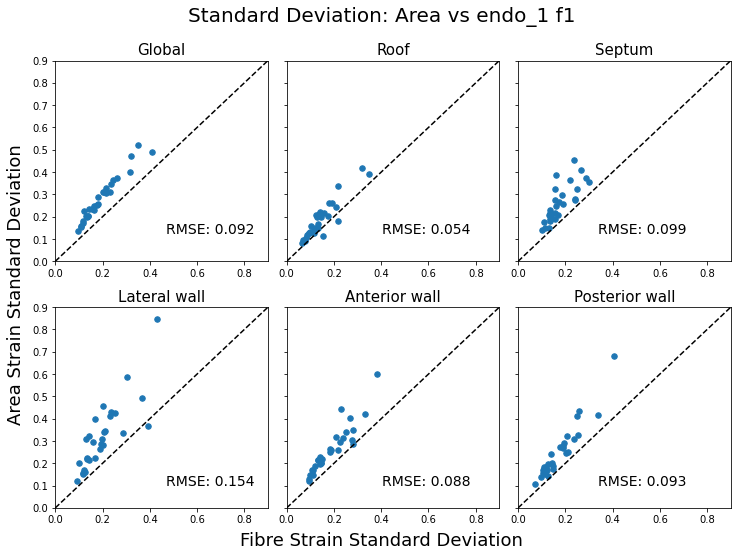

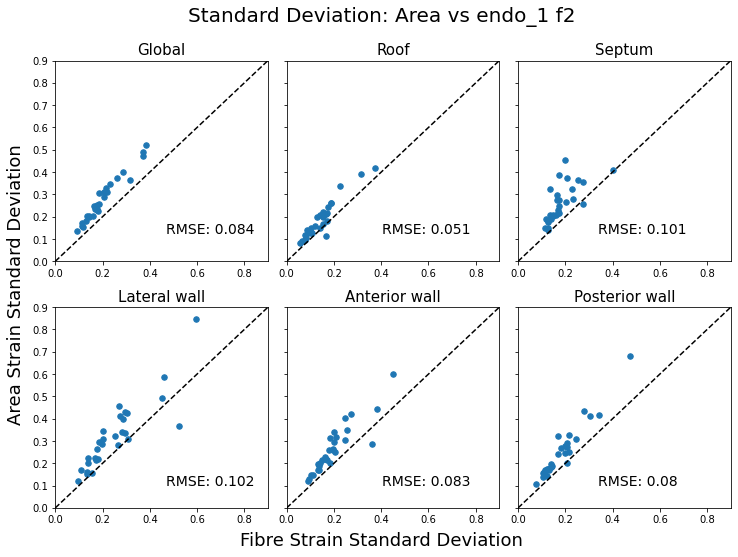

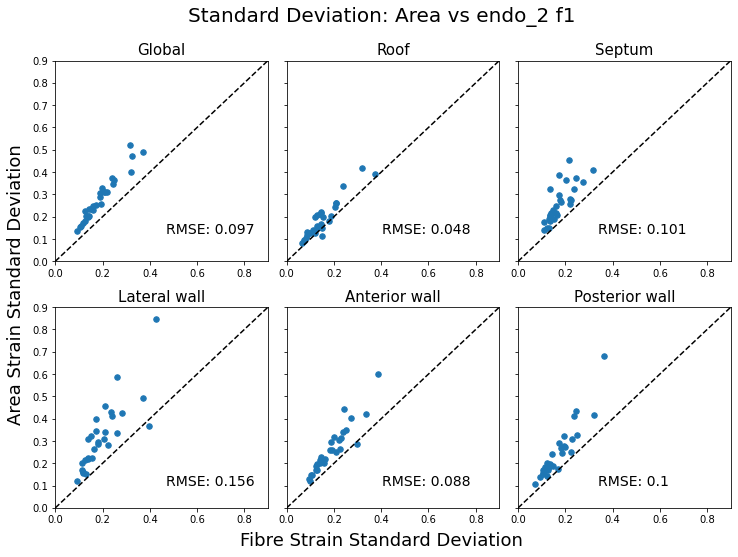

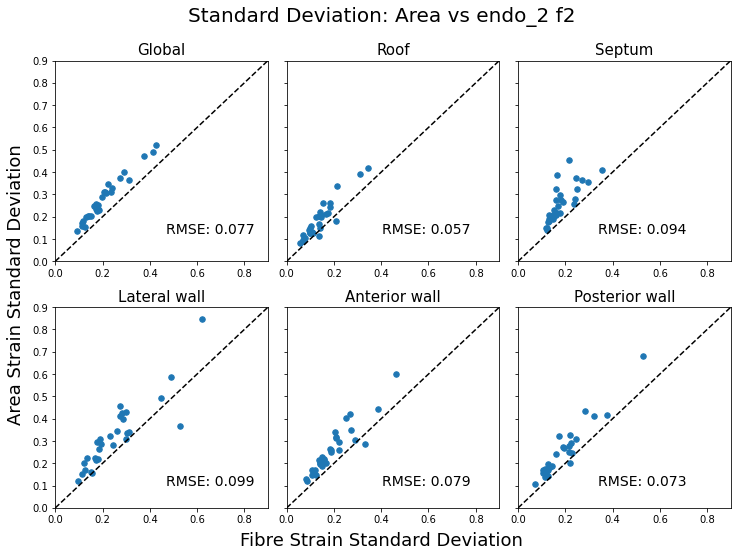

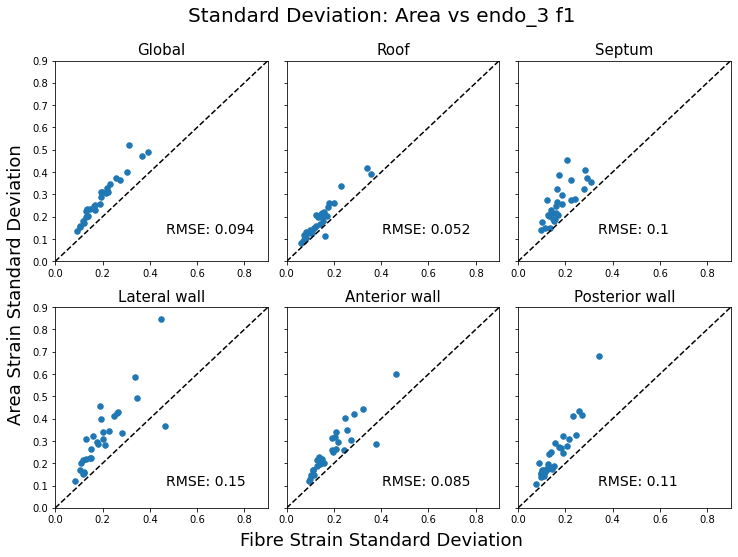

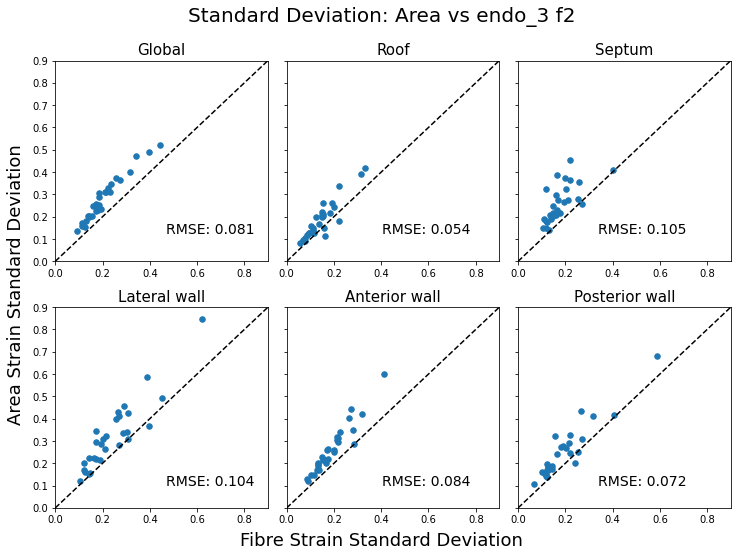

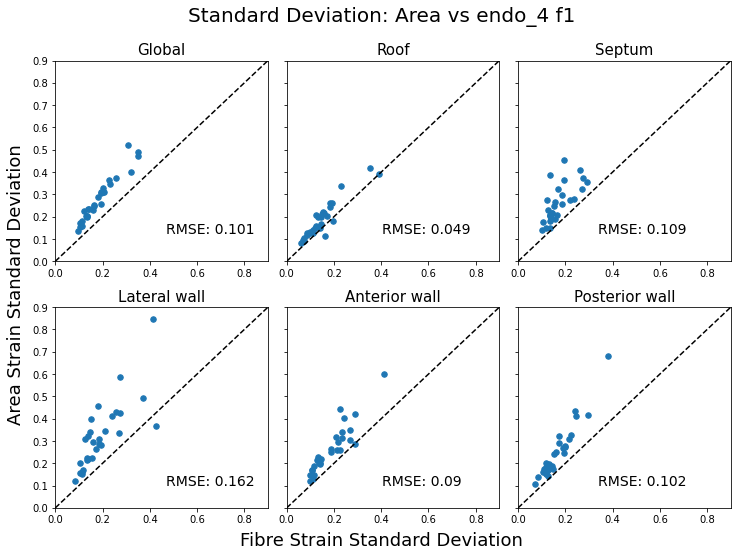

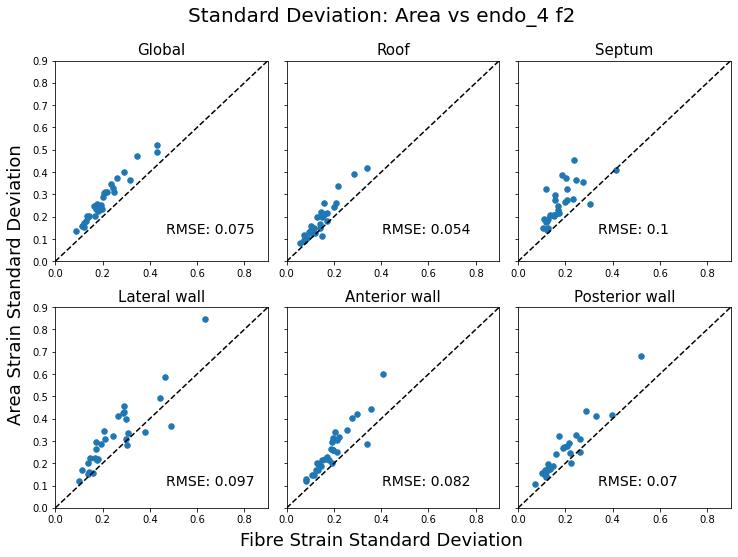

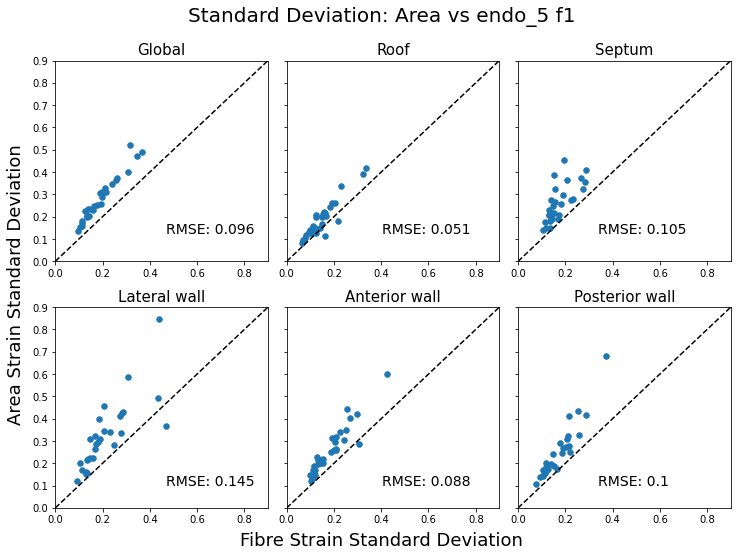

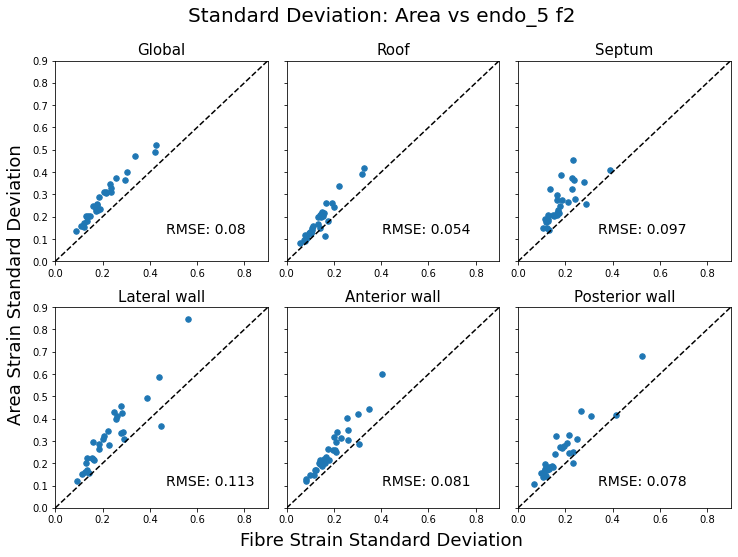

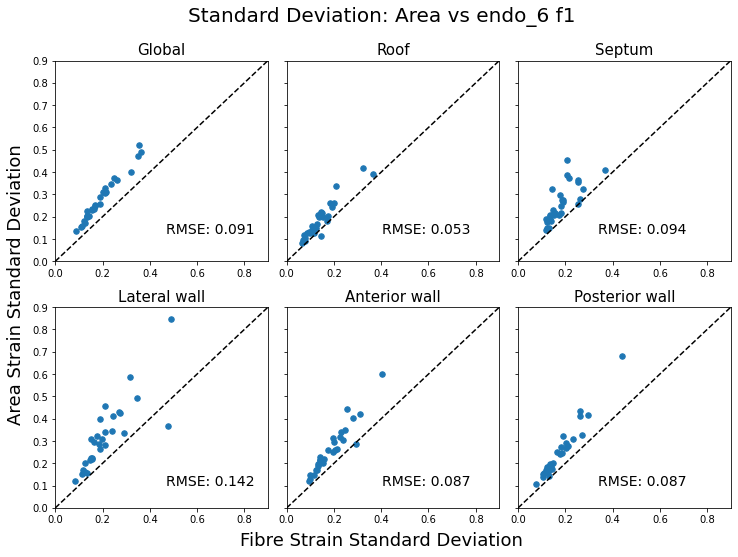

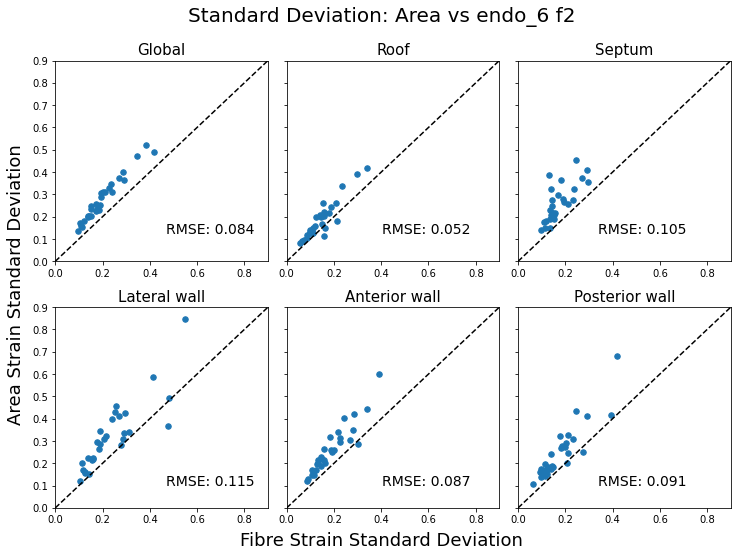

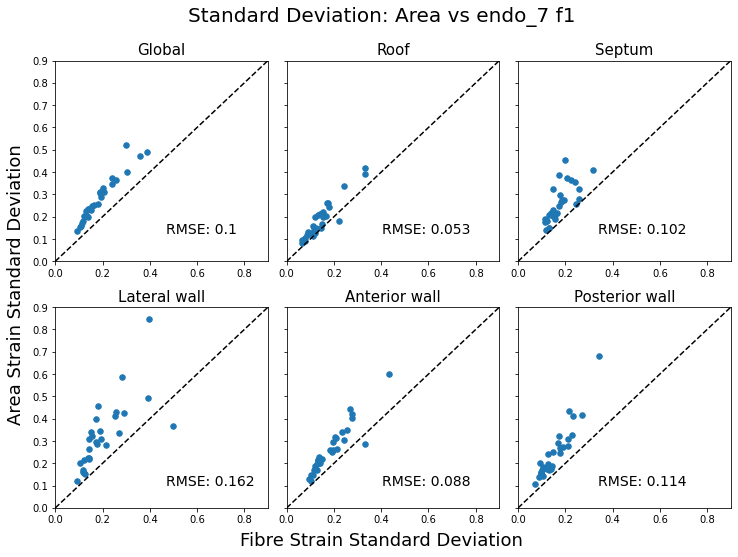

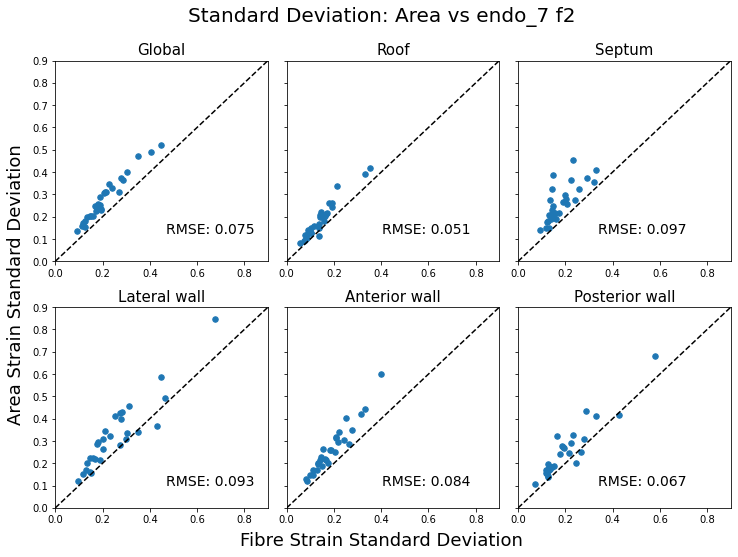

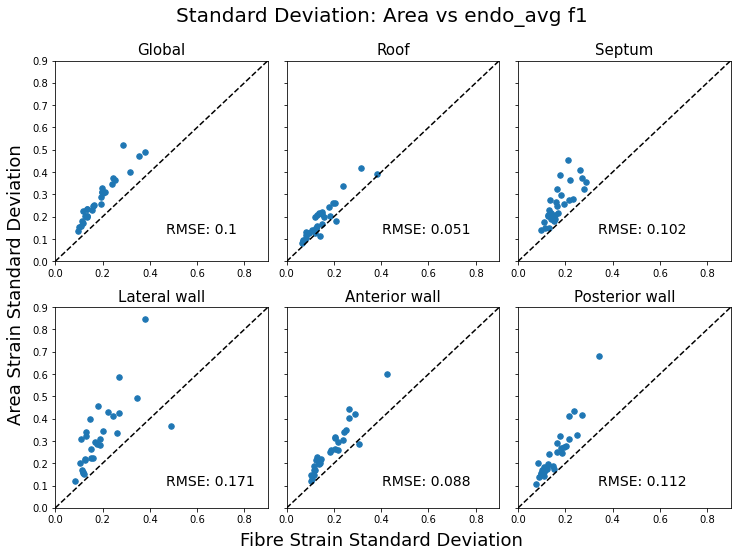

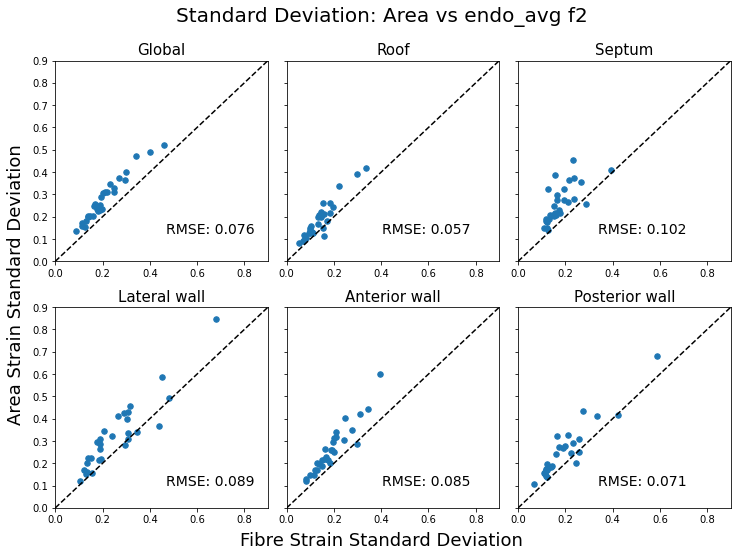

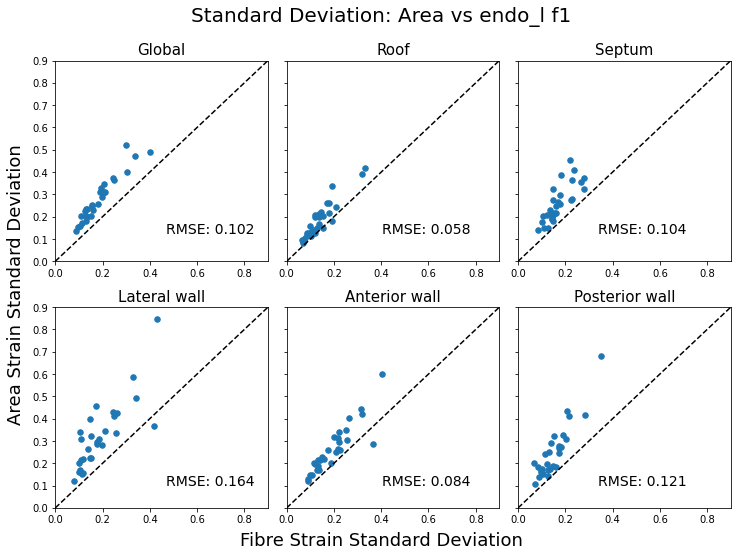

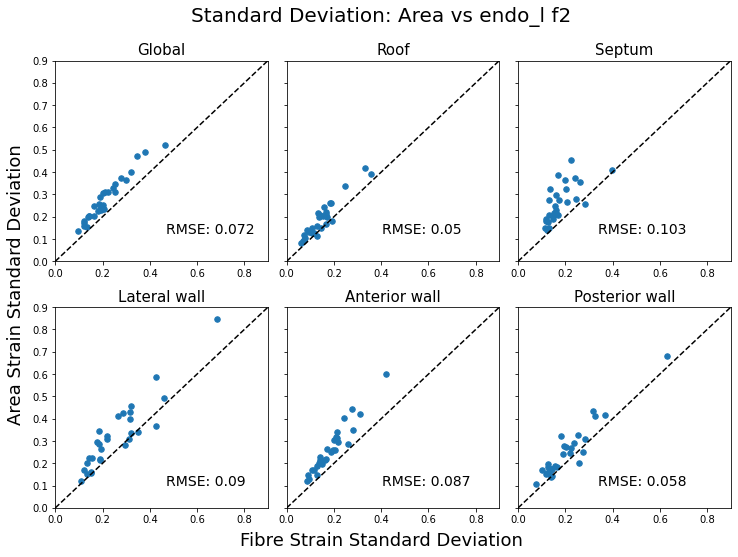

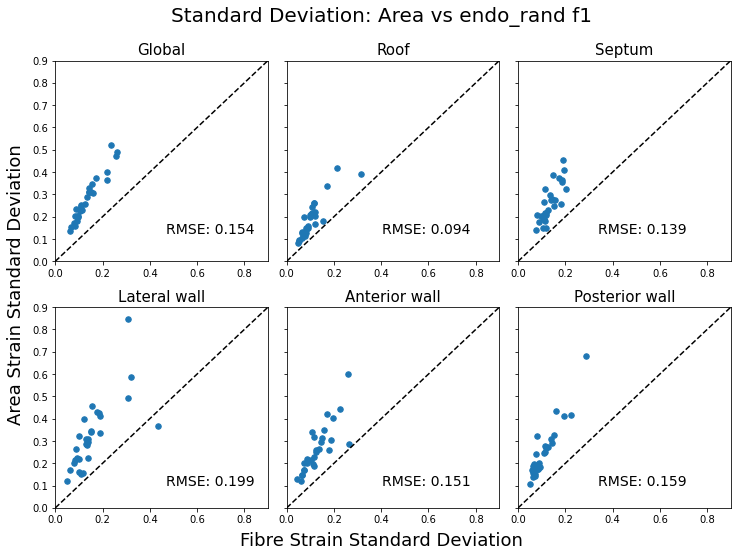

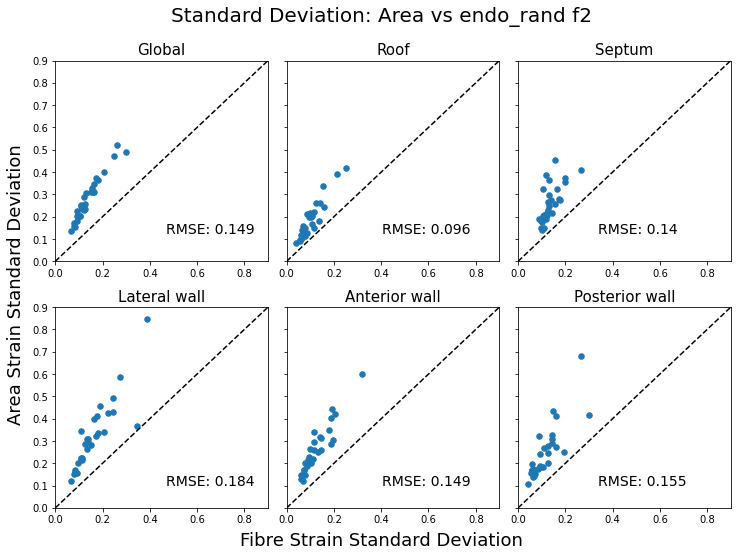

In [73]:
## Scatter plots

## Choose fiber architecture to plot for
arch_ind = 0
comp_ind = 0

for arch_ind in range(0, len(fib_arch_list)):
    print("FIBRE ARCH: ", fib_arch_list[arch_ind])

    for comp_ind in range(0,2):
        print("Fibre Strain Component: ", components[comp_ind])

        ## Calculate pearson r coeff and rmse
        pearsonr_glob = stats.pearsonr(fib_std[:, arch_ind, comp_ind], area_std[:])
        pearsonr_reg = np.zeros((5,))

        RMSE_glob = mean_squared_error(fib_std[:, arch_ind, comp_ind], area_std[:], 
                                       squared=False)
        RMSE_reg = np.zeros((5,))

#         print(f"Global:\t\tr:\t{np.round(pearsonr_glob[0],3)}\trmse:\t{np.round(RMSE_glob, 3)}")

        for i in range(0, 5):
            pearsonr_reg[i] = stats.pearsonr(fib_reg_std[:, i, arch_ind, comp_ind], 
                                         area_reg_std[:, i])[0]
            RMSE_reg[i] = mean_squared_error(fib_reg_std[:, i, arch_ind, comp_ind], 
                                         area_reg_std[:, i], squared=False)

#             print(f"Region: {regions[i]}",
#                  f"\tr:\t{np.round(pearsonr_reg[i],3)}",
#                  f"\trmse:\t{np.round(RMSE_reg[i],3)}")

        ## Plotting Scatter plots

        fig, ((ax1, ax2, ax3), 
              (ax4, ax5, ax6)) = plt.subplots(2,3,figsize=(10,7), 
                                    facecolor='white', sharey=True)

        ax1.scatter(fib_std[:, arch_ind, comp_ind], area_std[:], label="Global",s=30, alpha=1.0)
        for i in range(0, len(regions)):

            fig.axes[i+1].scatter(fib_reg_std[:, i, arch_ind, comp_ind], area_reg_std[:, i], s=30, alpha=1.0)

        titles = ["Global", "Roof", "Septum", "Lateral wall", "Anterior wall", "Posterior wall"]

        for i in range(0, len(fig.axes)):
            fig.axes[i].plot(np.arange(0,1,0.1), np.arange(0,1,0.1), ls='--', c='black')
            fig.axes[i].set_ylim(0.0, 0.9)
            fig.axes[i].set_xlim(0.0, 0.9)
            fig.axes[i].set_title(titles[i], fontsize=15)

        plt.tight_layout()
        fig.text(-0.02, 0.5, "Area Strain Standard Deviation",
                 va='center', rotation='vertical', fontsize=18)
        fig.text(0.5, -0.02, "Fibre Strain Standard Deviation", 
                 ha='center', fontsize=18)
        fig.text(0.5, 1.02, f"Standard Deviation: Area vs {fib_arch_list[arch_ind]} {components[comp_ind]}", 
                 ha='center', fontsize=20)

        fig.text(0.2, 0.6, f"RMSE: {np.round(RMSE_glob, 3)}", fontsize=14)
        fig.text(0.5, 0.6, f"RMSE: {np.round(RMSE_reg[0], 3)}", fontsize=14)
        fig.text(0.8, 0.6, f"RMSE: {np.round(RMSE_reg[1], 3)}", fontsize=14)
        fig.text(0.2, 0.1, f"RMSE: {np.round(RMSE_reg[2], 3)}", fontsize=14)
        fig.text(0.5, 0.1, f"RMSE: {np.round(RMSE_reg[3], 3)}", fontsize=14)
        fig.text(0.8, 0.1, f"RMSE: {np.round(RMSE_reg[4], 3)}", fontsize=14)

#         plt.savefig(f"/home/csi20/Dropbox/phd/Documents/P1/figures/fiber_strains/{fib_arch_list[arch_ind]}/stddev_area-{components[comp_ind]}.png",
#                    dpi=200, bbox_inches="tight")

In [71]:
p_vals = np.zeros((6,))
p_vals[0] = stats.ttest_ind(fib_std[:, -2, 0], area_std[:])[-1]

for i in range(0, len(regions)):
    ## indexing as follows: p_vals; region; f1 component
    p_vals[i+1]=stats.ttest_ind(fib_reg_std[:, i, -2, 0], area_reg_std[:, i])[-1]

p_vals

array([2.08394798e-04, 5.90443559e-02, 1.76711790e-05, 1.58464364e-04,
       2.48305151e-03, 6.21438144e-04])

FIBRE ARCH:  endo_1
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_2
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_3
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_4
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_5
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_6
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_7
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_avg
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_l
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_rand
Fibre Strain Component:  f1
Fibre Strain Component:  f2


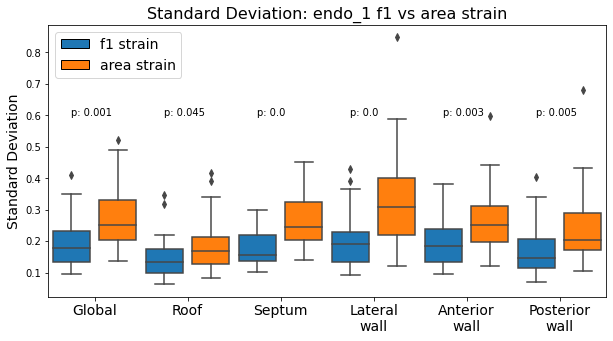

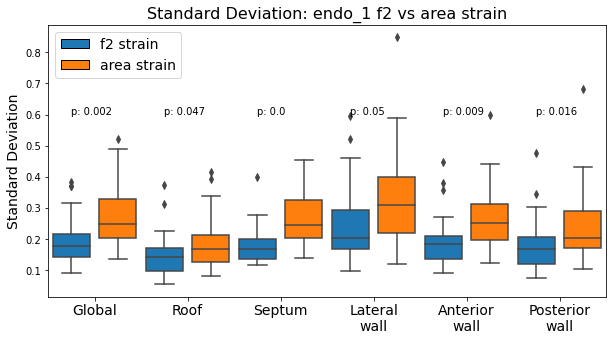

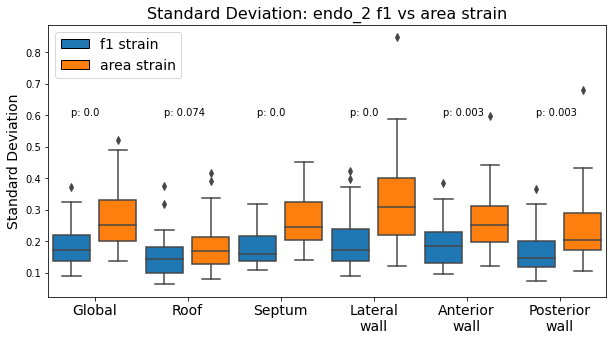

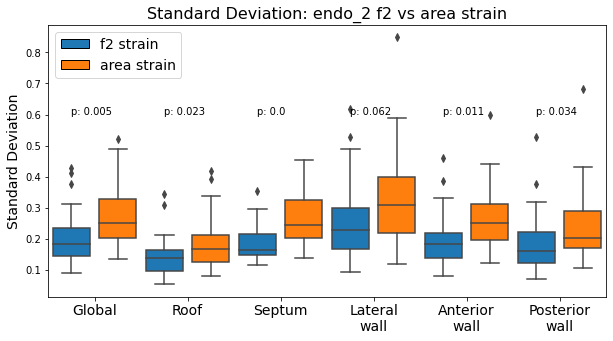

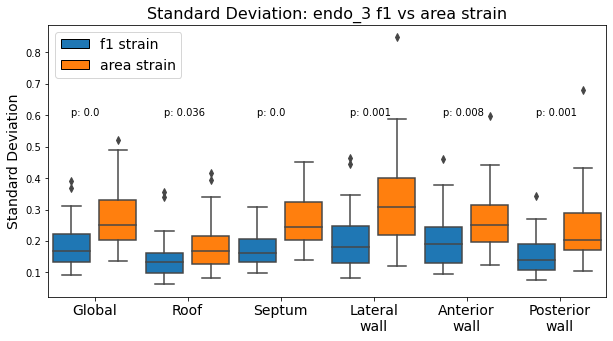

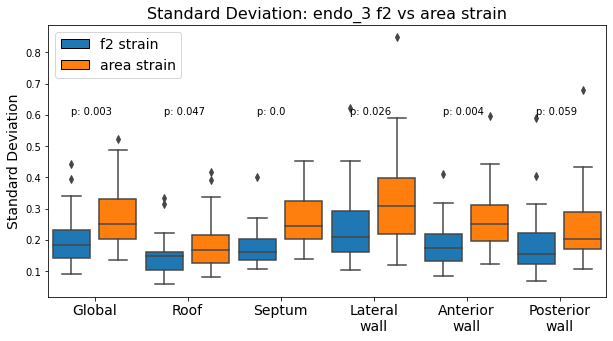

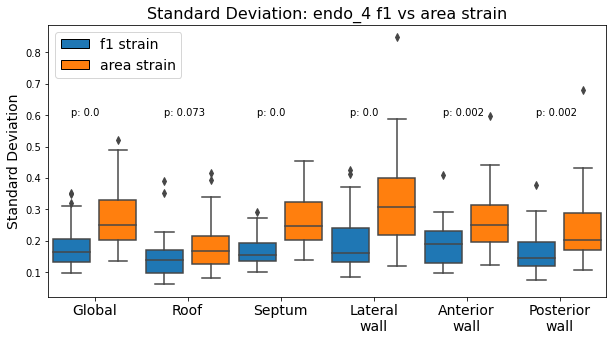

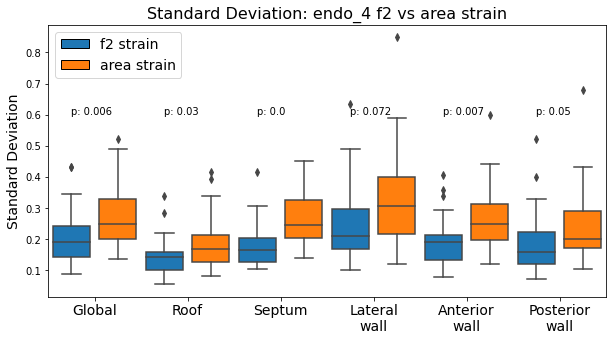

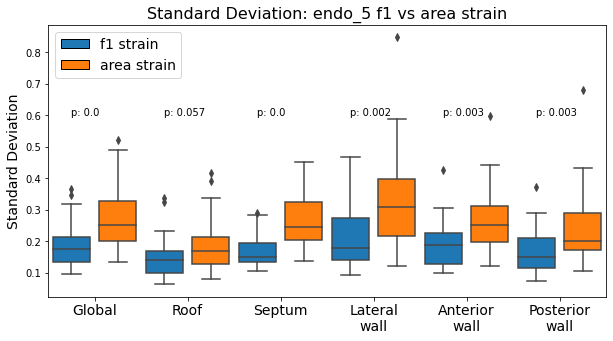

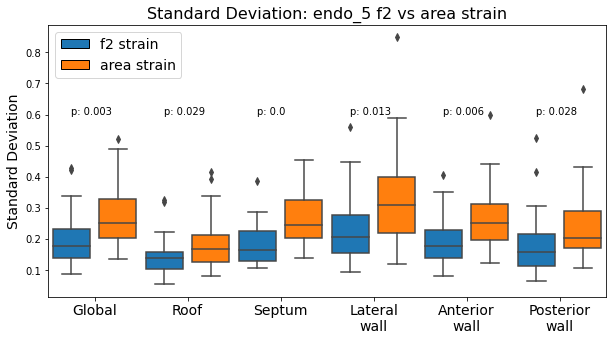

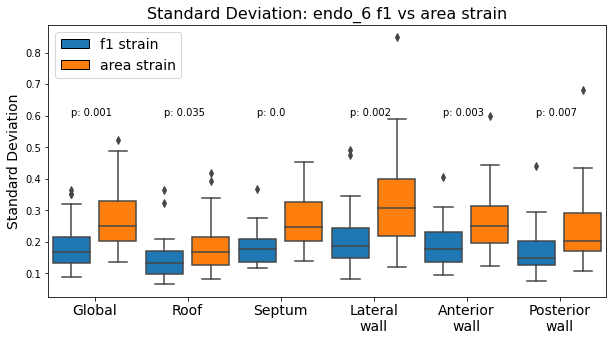

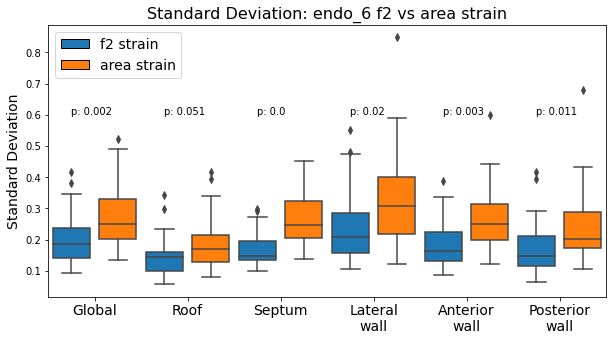

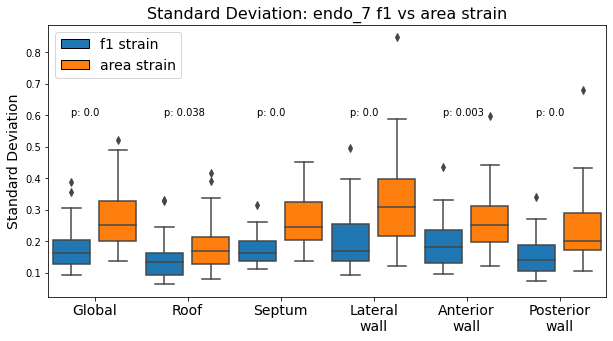

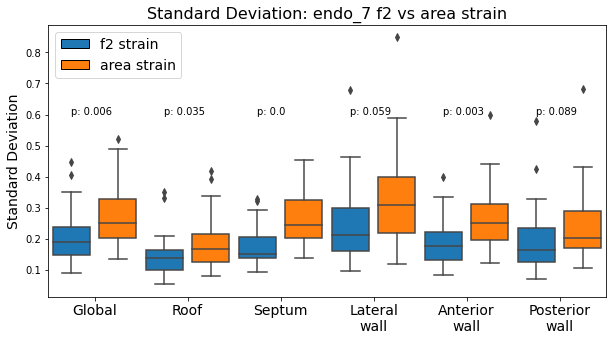

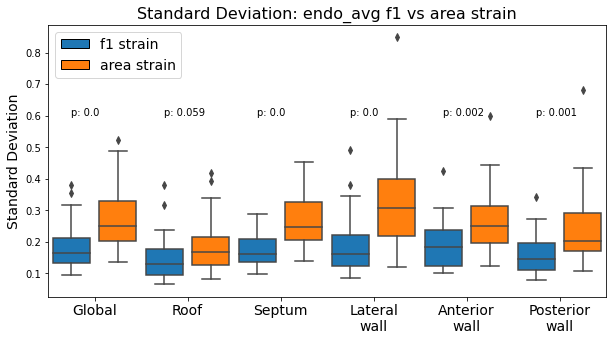

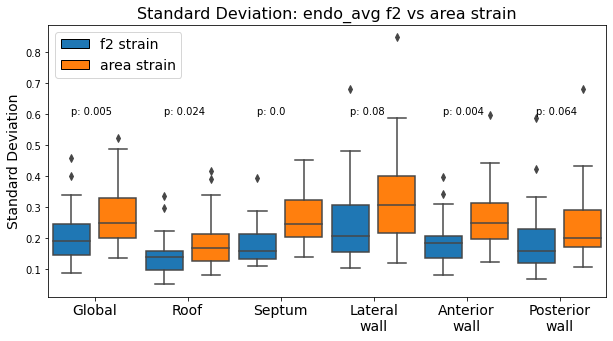

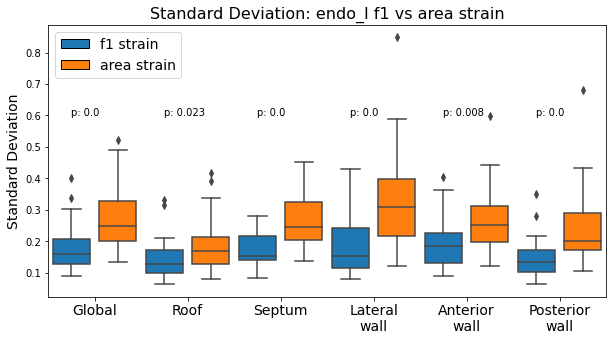

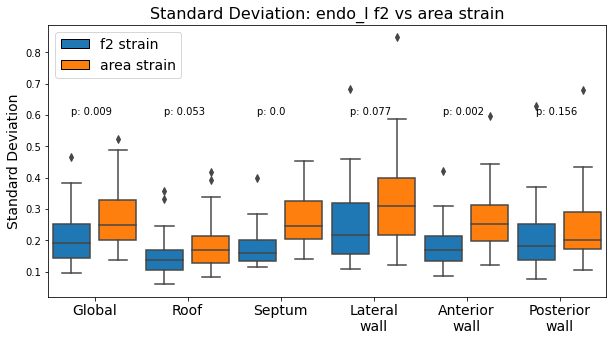

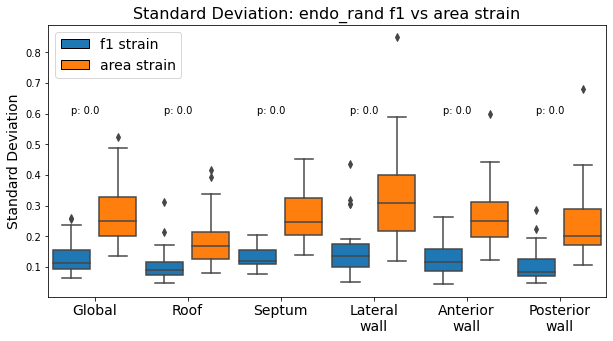

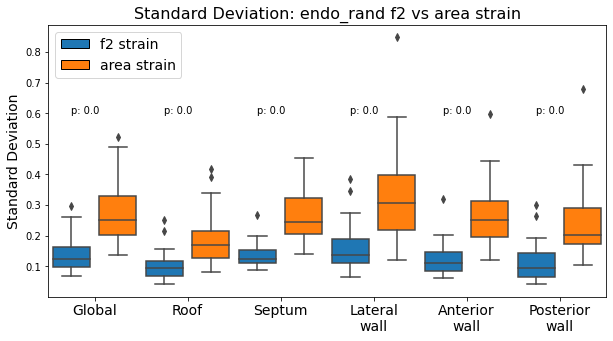

In [78]:
## Boxplots 

for arch_ind in range(0, len(fib_arch_list)):
    print("FIBRE ARCH: ", fib_arch_list[arch_ind])
    
    for comp_ind in range(0, len(components)):    
        print("Fibre Strain Component: ", components[comp_ind])

        ## calc pvals

        p_vals = np.zeros((6,))
        p_vals[0] = stats.ttest_ind(fib_std[:, arch_ind, comp_ind], area_std[:])[-1]

        for i in range(0, len(regions)):
            p_vals[i+1]=stats.ttest_ind(fib_reg_std[:, i, arch_ind, comp_ind], area_reg_std[:, i])[-1]

        fig, ((ax1)) = plt.subplots(1,1,figsize=(10,5), facecolor='white')

        data_to_plot = [fib_std[:, arch_ind, comp_ind], area_std[:],
                        fib_reg_std[:, 0, arch_ind, comp_ind], area_reg_std[:, 0],
                        fib_reg_std[:, 1, arch_ind, comp_ind], area_reg_std[:, 1],
                        fib_reg_std[:, 2, arch_ind, comp_ind], area_reg_std[:, 2],
                        fib_reg_std[:, 3, arch_ind, comp_ind], area_reg_std[:, 3],
                        fib_reg_std[:, 4, arch_ind, comp_ind], area_reg_std[:, 4]]

        sns.boxplot(data=data_to_plot, ax=ax1)

        for i in range(0, 12, 2):
            mybox = ax1.patches[i]
            mybox.set_facecolor('tab:blue')

        for i in range(1, 13, 2):
            mybox = ax1.patches[i]
            mybox.set_facecolor('tab:orange')

        legend_elements = [Patch(facecolor='tab:blue', edgecolor='black',
                                 label=f'{components[comp_ind]} strain'),
                           Patch(facecolor='tab:orange', edgecolor='black',
                                 label='area strain')]
        ax1.legend(handles=legend_elements, loc='upper left', fontsize=14)

        ax1.set_ylabel("Standard Deviation", fontsize=14)

        regions_axis=['Global', 'Roof', 'Septum', 'Lateral\nwall', 'Anterior\nwall', 'Posterior\nwall']
        ax1.set_xticks(ticks=np.arange(0.5,11.5,2))
        ax1.set_xticklabels(regions_axis, fontsize=14)

        plt.title(f"Standard Deviation: {fib_arch_list[arch_ind]} {components[comp_ind]} vs area strain", fontsize=16)

        for i in range(0, p_vals.shape[0]):
            plt.text(2*i, 0.6, f"p: {np.round(p_vals[i], 3)}")

#         plt.savefig(f"/home/csi20/Dropbox/phd/Documents/P1/figures/fiber_strains/{fib_arch_list[arch_ind]}/std_boxplot_area-{components[comp_ind]}.png",
#                    dpi=200, bbox_inches="tight")

In [79]:
p_vals = np.zeros((6,))
p_vals[0] = stats.ttest_ind(fib_std[:, -2, 0], area_std[:])[-1]

for i in range(0, len(regions)):
    ## indexing as follows: p_vals; region; f1 component
    p_vals[i+1]=stats.ttest_ind(fib_reg_std[:, i, -2, 0], area_reg_std[:, i])[-1]

p_vals

array([1.57350378e-04, 2.29495291e-02, 9.45098050e-06, 1.41742775e-04,
       7.62254047e-03, 1.66391400e-04])

Comment Feb 10th:
* Area strain has larger standard deviation in ALL regions when compared with either f1 or f2!
* This suggests green strain calculation + projection always gives smaller std regarldess of orientation projection used. 
* A more like-for-like comparison therefore is in comparing f1 vs f2 std and mean
* **To test this, anlyse differences in strain mean and std using a randomly-generated fiber arch. I.e. take cell normal and generate random perpendicular vector and calc strains. Then compare std and mean. If std is still significantly smaller, then we can say green strain projection artifically create more homogeneous strains than area strain calculation**  

## f1 vs f2

In [80]:
## Calculate pearson r coeff between area and DTMRI fibs
## Calculate rmse

pearsonr_glob = stats.pearsonr(fib_std[:, -2, 1], fib_std[:, -2, 0])
pearsonr_reg = np.zeros((5,))

RMSE_glob = mean_squared_error(fib_std[:, -2, 1], fib_std[:, -2, 0], 
                               squared=False)
RMSE_reg = np.zeros((5,))

print(f"Global:\t\tr:\t{np.round(pearsonr_glob[0],3)}\trmse:\t{np.round(RMSE_glob, 3)}")

for i in range(0, 5):
    pearsonr_reg[i] = stats.pearsonr(fib_reg_std[:, i, -2, 1], 
                                 fib_reg_std[:, i, -2, 0])[0]
    RMSE_reg[i] = mean_squared_error(fib_reg_std[:, i, -2, 1], 
                                 fib_reg_std[:, i, -2, 0], squared=False)
    

    print(f"Region: {regions[i]}",
         f"\tr:\t{np.round(pearsonr_reg[i],3)}",
         f"\trmse:\t{np.round(RMSE_reg[i],3)}")

Global:		r:	0.908	rmse:	0.045
Region: roof 	r:	0.939 	rmse:	0.024
Region: sept 	r:	0.666 	rmse:	0.048
Region: lat 	r:	0.821 	rmse:	0.1
Region: ant 	r:	0.929 	rmse:	0.031
Region: post 	r:	0.853 	rmse:	0.086


In [84]:
fib_reg_std.shape

(29, 5, 10, 2)

FIBER ARCH:  endo_avg


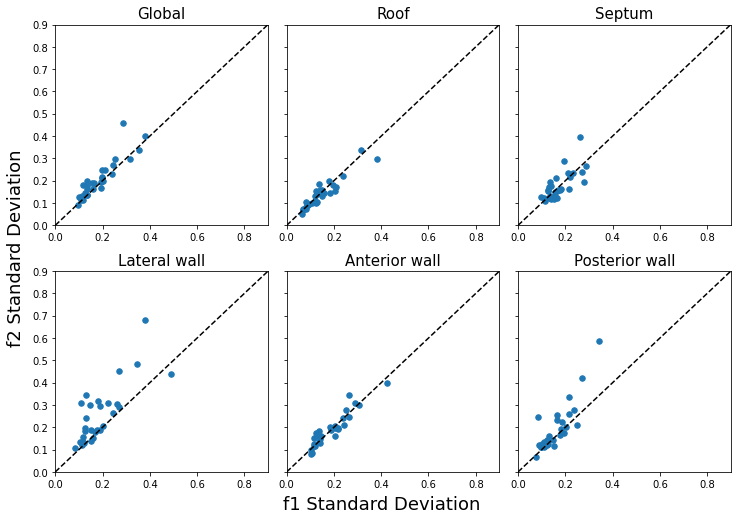

In [187]:
for arch_ind in [-3]:
    print("FIBER ARCH: ", fib_arch_list[arch_ind])

    ## Calculate pearson r coeff and RMSE

    pearsonr_glob = stats.pearsonr(fib_std[:, arch_ind, 1], fib_std[:, arch_ind, 0])
    pearsonr_reg = np.zeros((5,))

    RMSE_glob = mean_squared_error(fib_std[:, arch_ind, 1], fib_std[:, arch_ind, 0], 
                                   squared=False)
    RMSE_reg = np.zeros((5,))

#     print(f"Global:\t\tr:\t{np.round(pearsonr_glob[0],3)}\trmse:\t{np.round(RMSE_glob, 3)}")

    for i in range(0, 5):
        pearsonr_reg[i] = stats.pearsonr(fib_reg_std[:, i, arch_ind, 1], 
                                     fib_reg_std[:, i, arch_ind, 0])[0]
        RMSE_reg[i] = mean_squared_error(fib_reg_std[:, i, arch_ind, 1], 
                                     fib_reg_std[:, i, arch_ind, 0], squared=False)

#         print(f"Region: {regions[i]}",
#              f"\tr:\t{np.round(pearsonr_reg[i],3)}",
#              f"\trmse:\t{np.round(RMSE_reg[i],3)}")

    ## Plotting Std Dev

    fig, ((ax1, ax2, ax3), 
          (ax4, ax5, ax6)) = plt.subplots(2,3,figsize=(10,7), 
                                facecolor='white', sharey=True)

    ax1.scatter(fib_std[:, arch_ind, 0], fib_std[:, arch_ind, 1], label="Global",s=30, alpha=1.0)

    for i in range(0, len(regions)):
        fig.axes[i+1].scatter(fib_reg_std[:, i, arch_ind, 0], fib_reg_std[:, i, arch_ind, 1],s=30, alpha=1.0)

    titles = ["Global", "Roof", "Septum", "Lateral wall", "Anterior wall", "Posterior wall"]
    for i in range(0, len(fig.axes)):
                fig.axes[i].plot(np.arange(0,1,0.1), np.arange(0,1,0.1), ls='--', c='black')
                fig.axes[i].set_ylim(0.0, 0.9)
                fig.axes[i].set_xlim(0.0, 0.9)
                fig.axes[i].set_title(titles[i], fontsize=15)

    plt.tight_layout()
    fig.text(-0.02, 0.5, "f2 Standard Deviation",
             va='center', rotation='vertical', fontsize=18)
    fig.text(0.5, -0.02, "f1 Standard Deviation", 
             ha='center', fontsize=18)

#     fig.text(0.2, 0.6, f"RMSE: {np.round(RMSE_glob, 3)}", fontsize=14)
#     fig.text(0.5, 0.6, f"RMSE: {np.round(RMSE_reg[0], 3)}", fontsize=14)
#     fig.text(0.8, 0.6, f"RMSE: {np.round(RMSE_reg[1], 3)}", fontsize=14)
#     fig.text(0.2, 0.1, f"RMSE: {np.round(RMSE_reg[2], 3)}", fontsize=14)
#     fig.text(0.5, 0.1, f"RMSE: {np.round(RMSE_reg[3], 3)}", fontsize=14)
#     fig.text(0.8, 0.1, f"RMSE: {np.round(RMSE_reg[4], 3)}", fontsize=14)

    fig.text(0.5, 1.02, f"Standard Deviation: {fib_arch_list[arch_ind]} f1 vs {fib_arch_list[arch_ind]} f2", 
             ha='center', fontsize=20)

#     plt.savefig(f"/home/csi20/Dropbox/phd/Documents/P1/figures/fiber_strains/{fib_arch_list[arch_ind]}/stddev_f1-f2_noRMSE.png",
#                dpi=200, bbox_inches="tight")

In [91]:
## N_regions X N_coeffs
coeffs = np.zeros((6, 2))

coeffs[0, :] = np.polyfit(fib_std[:, -2, 0], fib_std[:, -2, 1], 1)

for i in range(0, len(regions)):
    coeffs[i+1,:] = np.polyfit(fib_reg_std[:, i, -2, 0], fib_reg_std[:, i, -2, 1], 1)

coeffs[:]

array([[ 1.02237877,  0.02436155],
       [ 1.01488413,  0.0039095 ],
       [ 0.78127186,  0.04447092],
       [ 1.11364349,  0.0477306 ],
       [ 0.83862423,  0.02300369],
       [ 1.49648254, -0.01580408]])

FIBER ARCH:  endo_1
FIBER ARCH:  endo_2
FIBER ARCH:  endo_3
FIBER ARCH:  endo_4
FIBER ARCH:  endo_5
FIBER ARCH:  endo_6
FIBER ARCH:  endo_7
FIBER ARCH:  endo_avg
FIBER ARCH:  endo_l
FIBER ARCH:  endo_rand


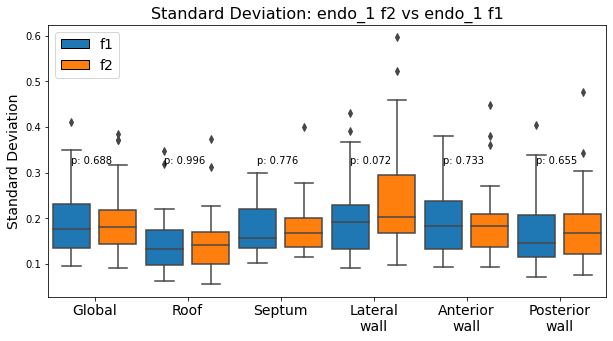

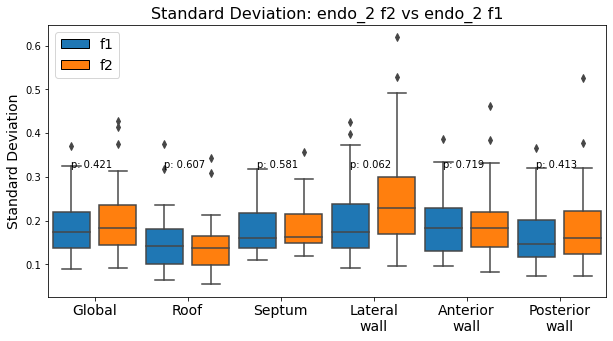

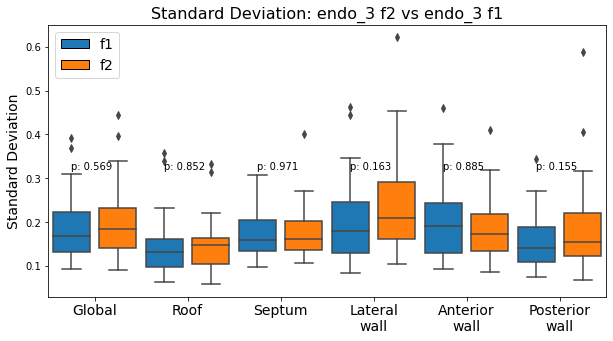

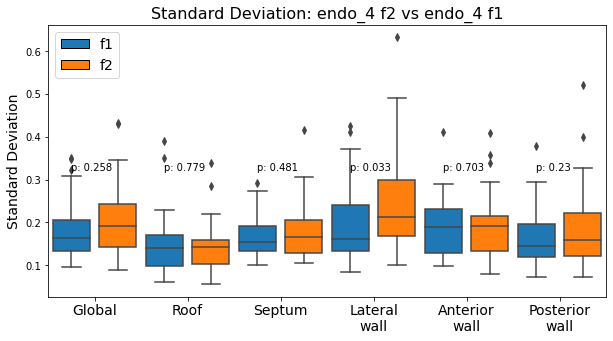

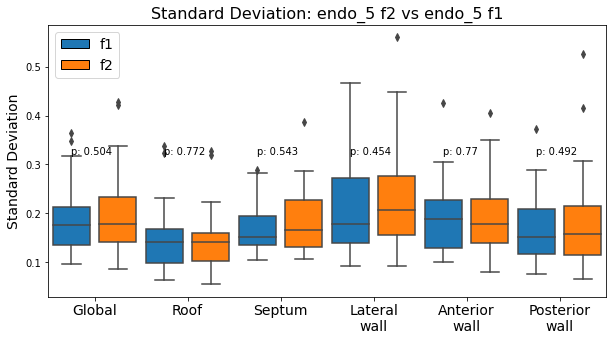

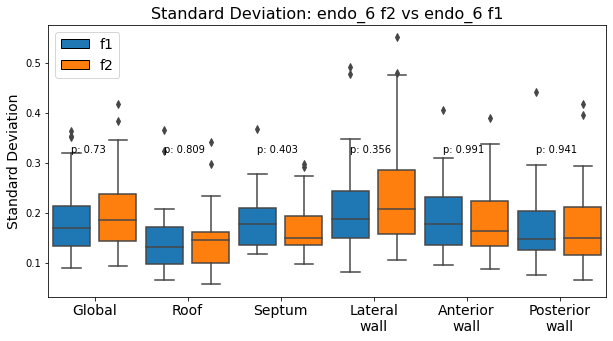

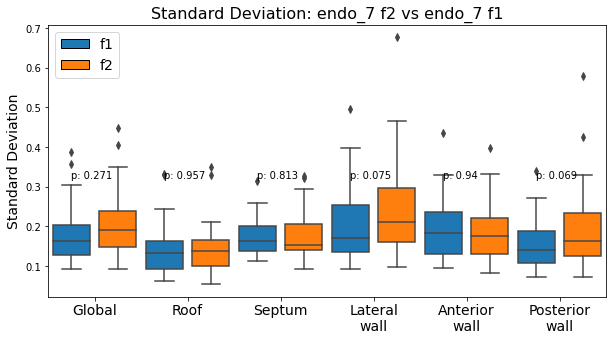

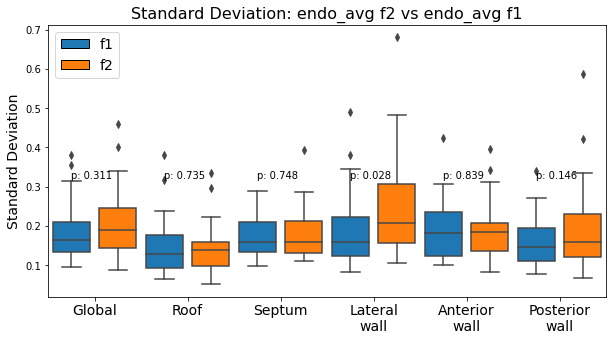

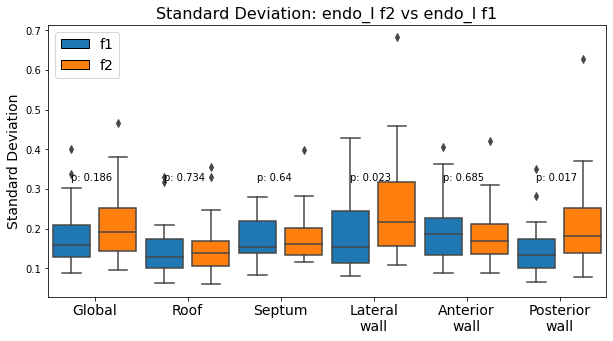

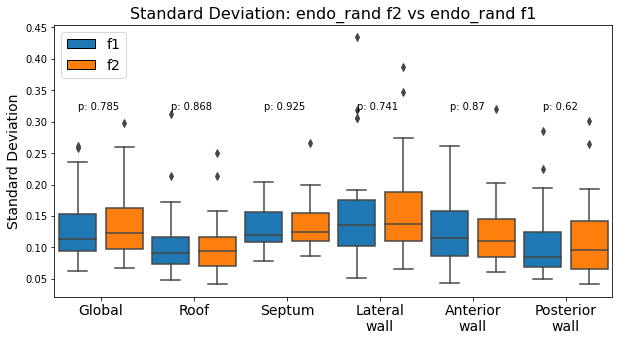

In [98]:
## Boxplots 

for arch_ind in range(0, len(fib_arch_list)):
    print("FIBER ARCH: ", fib_arch_list[arch_ind])

    ## Calculate p vals

    p_vals = np.zeros((6,))
    p_vals[0] = stats.ttest_ind(fib_std[:, arch_ind, 0], fib_std[:, arch_ind, 1])[-1]

    for i in range(0, len(regions)):
        ## indexing as follows: p_vals; region; f1 component
        p_vals[i+1]=stats.ttest_ind(fib_reg_std[:, i, arch_ind, 0], fib_reg_std[:, i, arch_ind, 1])[-1]

    p_vals

    ## Plot Boxplots

    fig, ((ax1)) = plt.subplots(1,1,figsize=(10,5), facecolor='white')

    data_to_plot = [fib_std[:, arch_ind, 0], fib_std[:, arch_ind, 1],
                    fib_reg_std[:, 0, arch_ind, 0], fib_reg_std[:, 0, arch_ind, 1],
                    fib_reg_std[:, 1, arch_ind, 0], fib_reg_std[:, 1, arch_ind, 1],
                    fib_reg_std[:, 2, arch_ind, 0], fib_reg_std[:, 2, arch_ind, 1],
                    fib_reg_std[:, 3, arch_ind, 0], fib_reg_std[:, 3, arch_ind, 1],
                    fib_reg_std[:, 4, arch_ind, 0], fib_reg_std[:, 4, arch_ind, 1]]

    sns.boxplot(data=data_to_plot, ax=ax1)

    for i in range(0, 12, 2):
        mybox = ax1.patches[i]
        mybox.set_facecolor('tab:blue')

    for i in range(1, 13, 2):
        mybox = ax1.patches[i]
        mybox.set_facecolor('tab:orange')

    legend_elements = [Patch(facecolor='tab:blue', edgecolor='black',
                             label='f1'),
                       Patch(facecolor='tab:orange', edgecolor='black',
                             label='f2')]
    ax1.legend(handles=legend_elements, loc='upper left', fontsize=14)

    ax1.set_ylabel("Standard Deviation", fontsize=14)

    regions_axis=['Global', 'Roof', 'Septum', 'Lateral\nwall', 'Anterior\nwall', 'Posterior\nwall']
    ax1.set_xticks(ticks=np.arange(0.5,11.5,2))
    ax1.set_xticklabels(regions_axis, fontsize=14)

    for i in range(0, p_vals.shape[0]):
        plt.text(2*i, 0.32, f"p: {np.round(p_vals[i], 3)}")

    plt.title(f"Standard Deviation: {fib_arch_list[arch_ind]} f2 vs {fib_arch_list[arch_ind]} f1", fontsize=16)

#     plt.savefig(f"/home/csi20/Dropbox/phd/Documents/P1/figures/fiber_strains/{fib_arch_list[arch_ind]}/std_boxplot_f1-f2.png",
#                dpi=200, bbox_inches="tight")

f1 vs f2 STD Comments:
* Looks like biggest difference in f1/f2 strain homogeneity occur in lateral and posterior walls.
    * **Only Lateral Wall has statistically significant difference in strain std between f1 and f2** 
* Discount RMSE < 0.043 
* Understand differences in fib arhitcture in the lat wall. (endo_avg)
    * Can then comment on how lateral wall directionally deforms

# Mean Analysis

## Area vs Fiber and Cross Fiber Strains

FIBRE ARCH:  endo_1
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_2
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_3
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_4
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_5
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_6
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_7
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_avg
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_l
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_rand
Fibre Strain Component:  f1
Fibre Strain Component:  f2


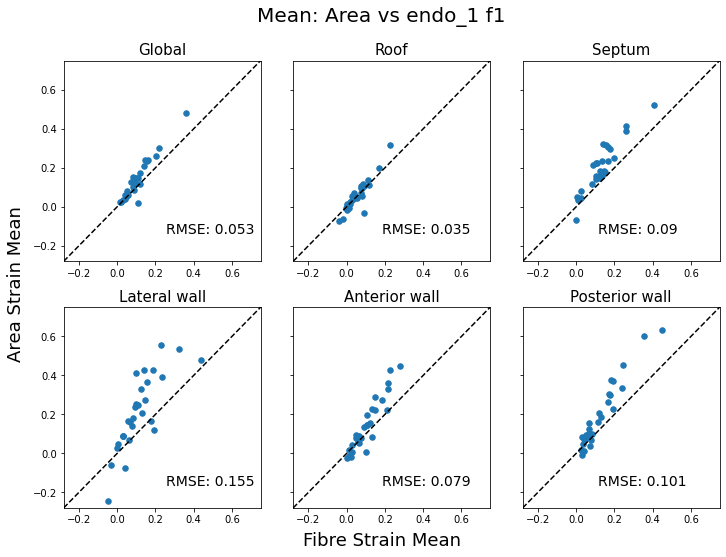

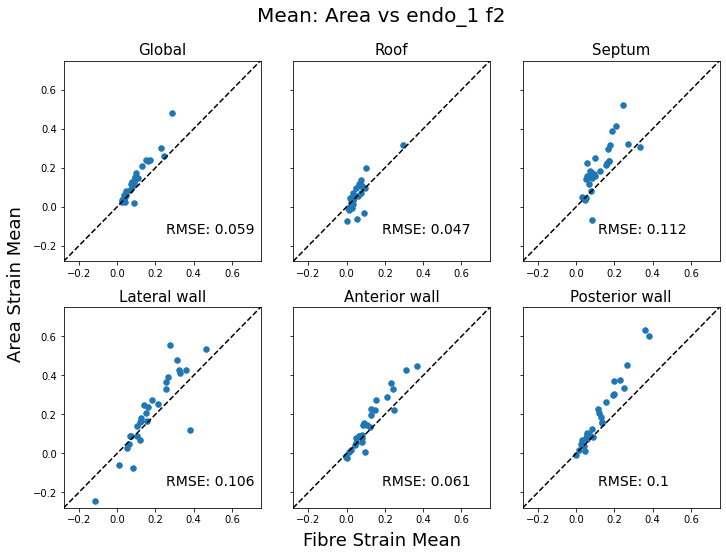

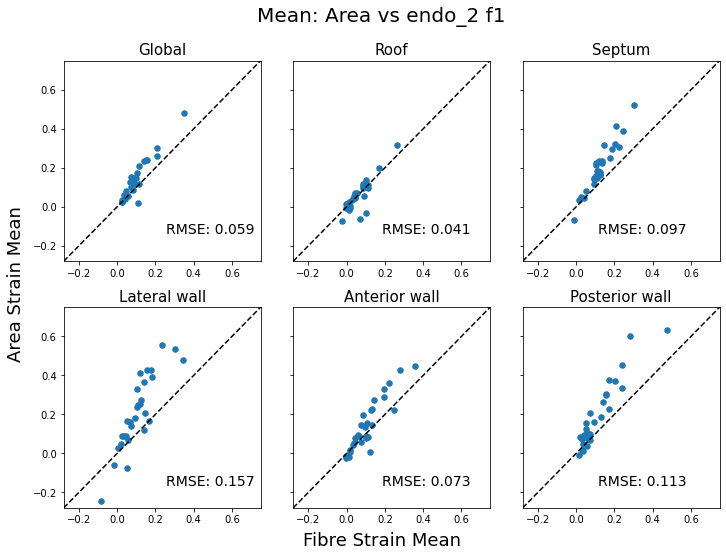

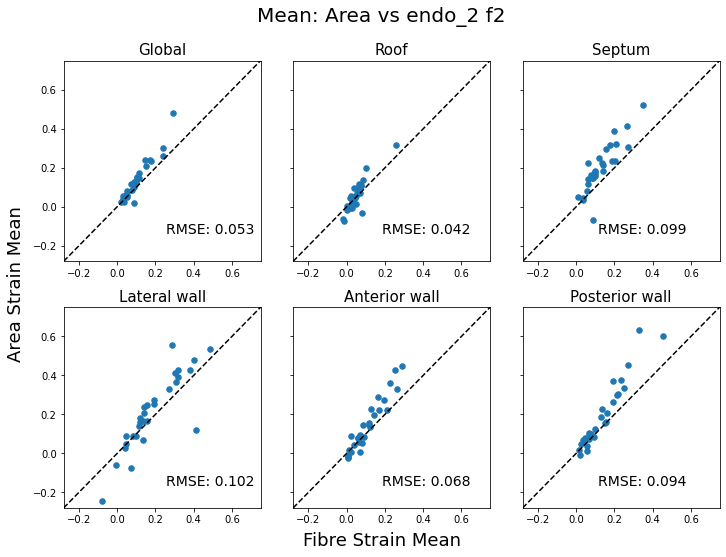

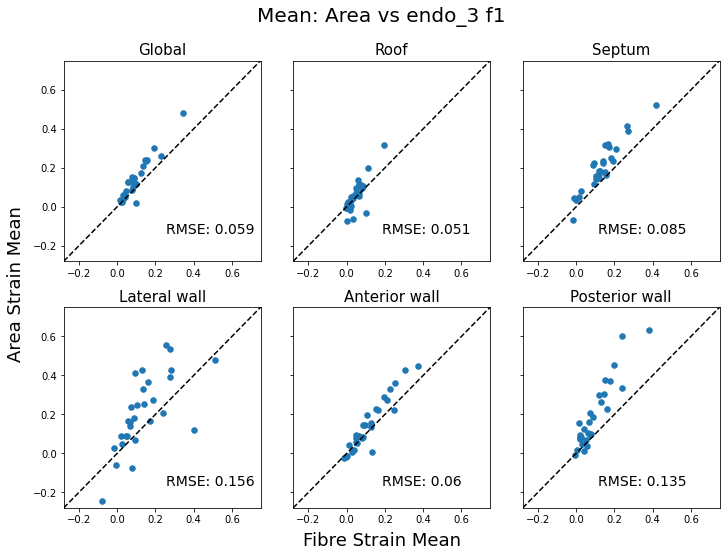

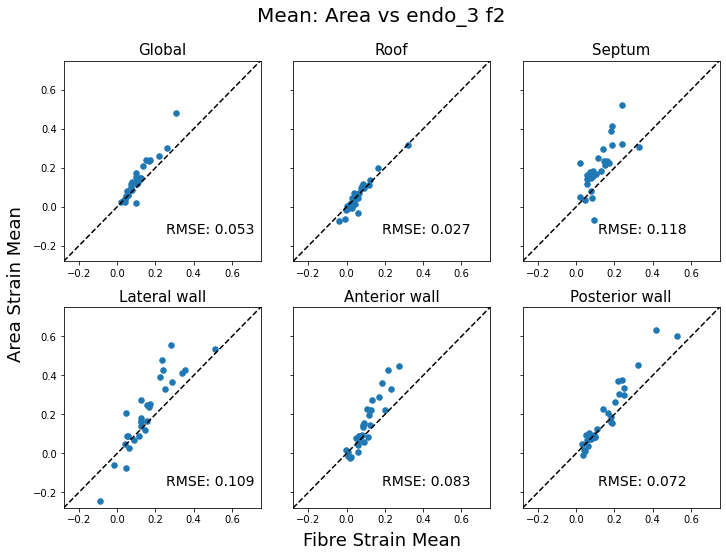

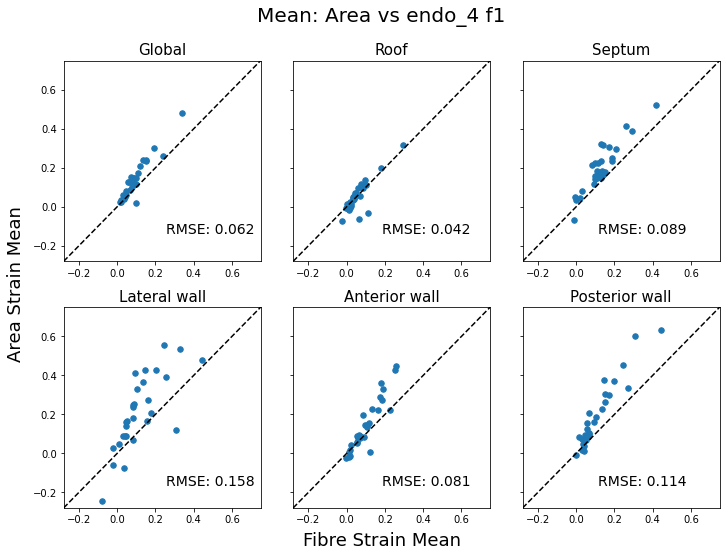

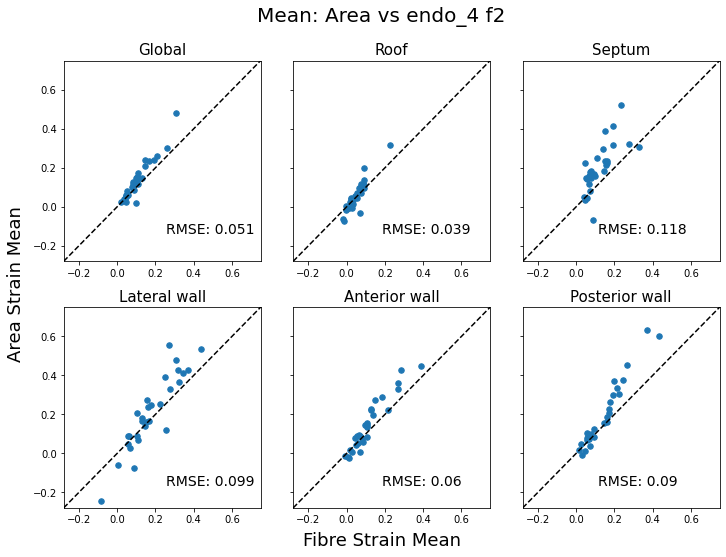

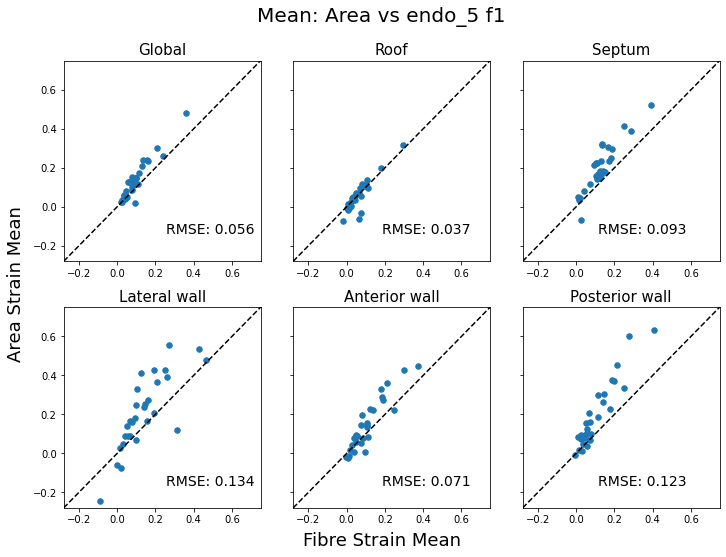

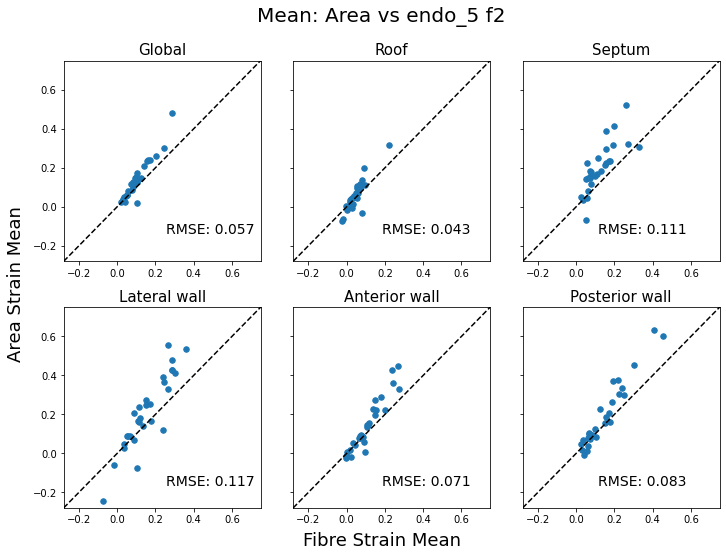

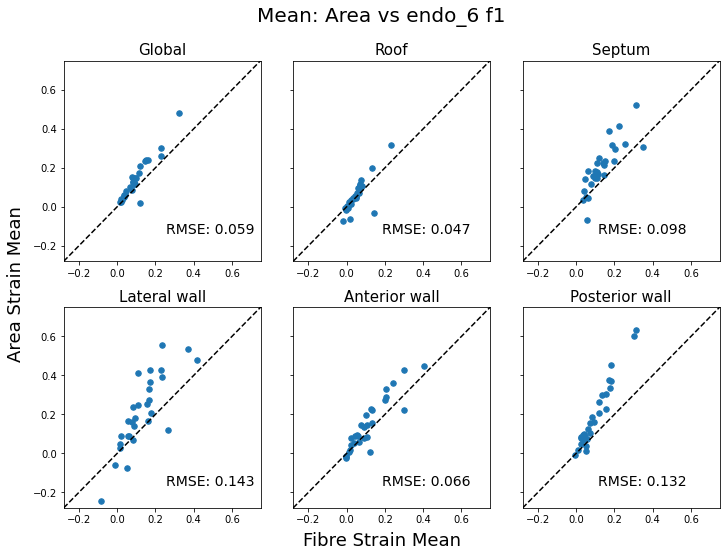

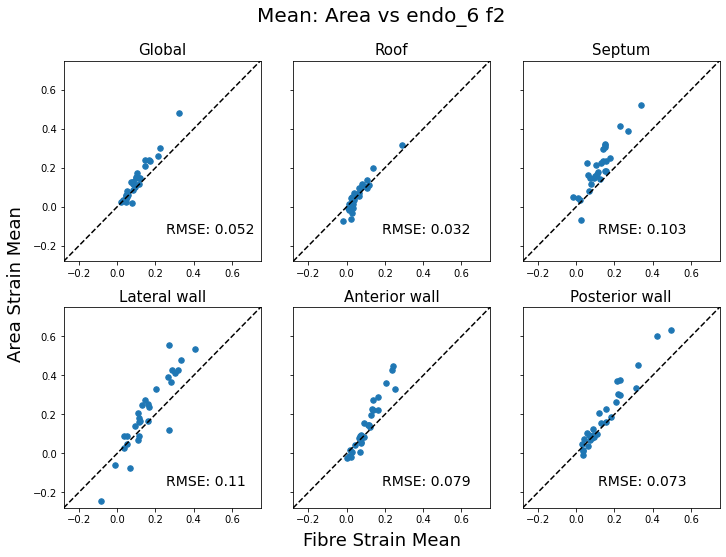

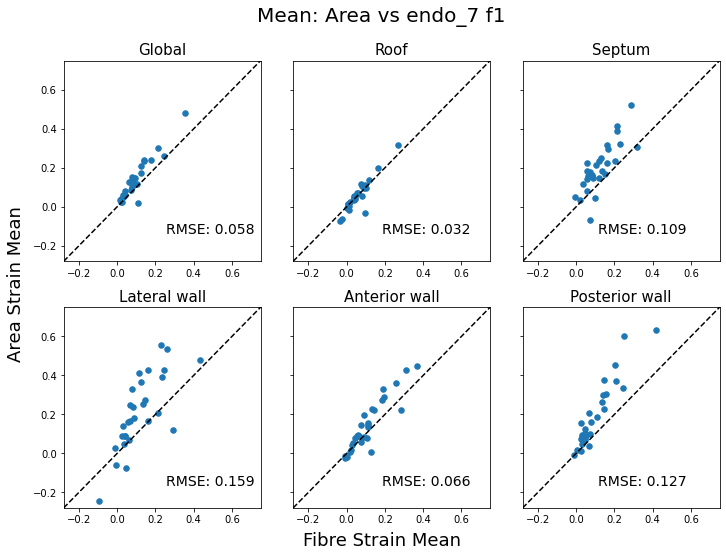

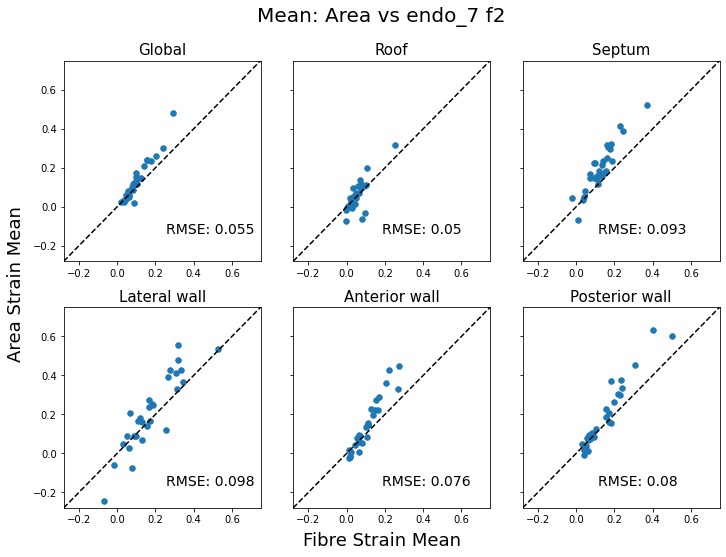

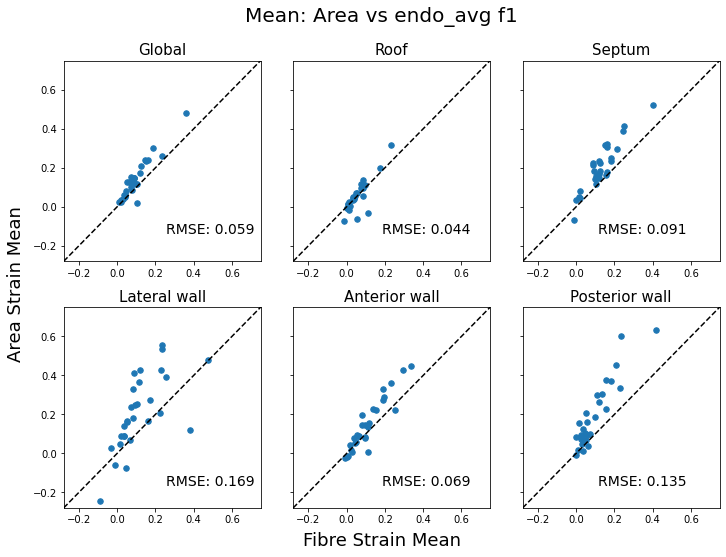

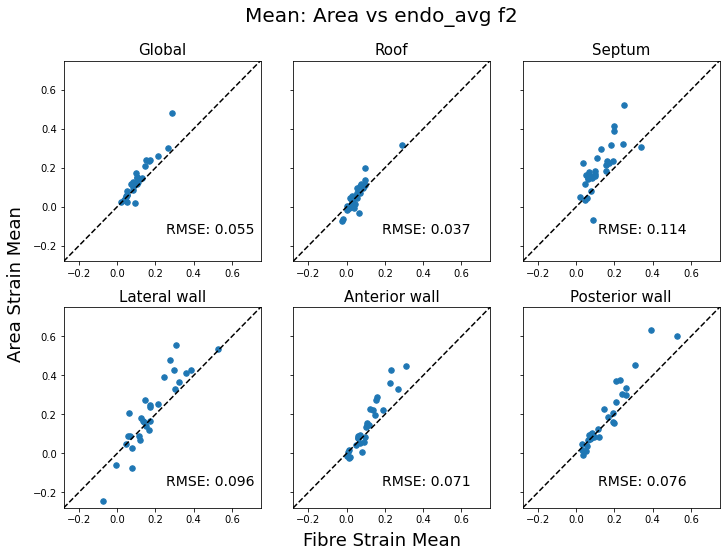

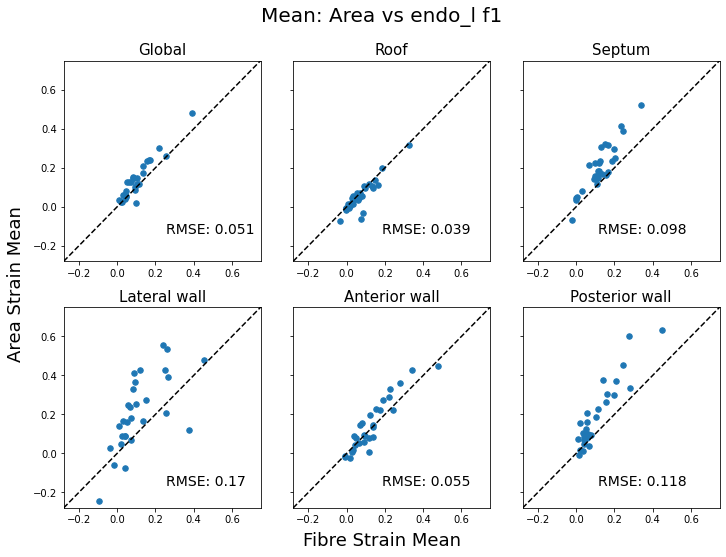

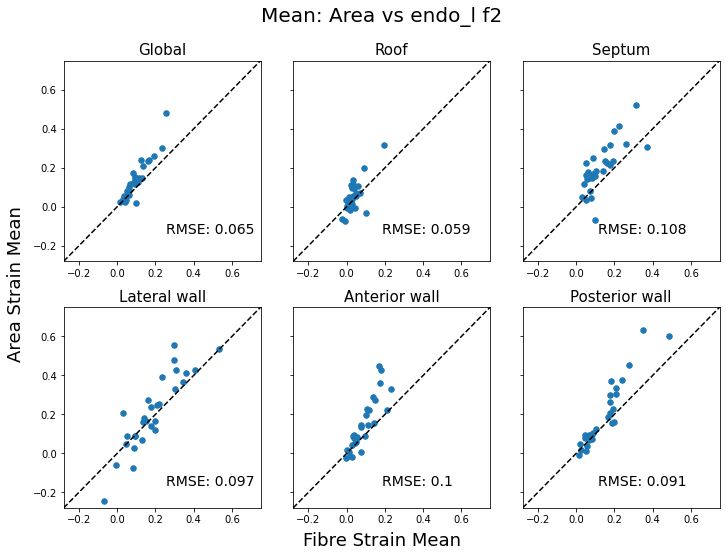

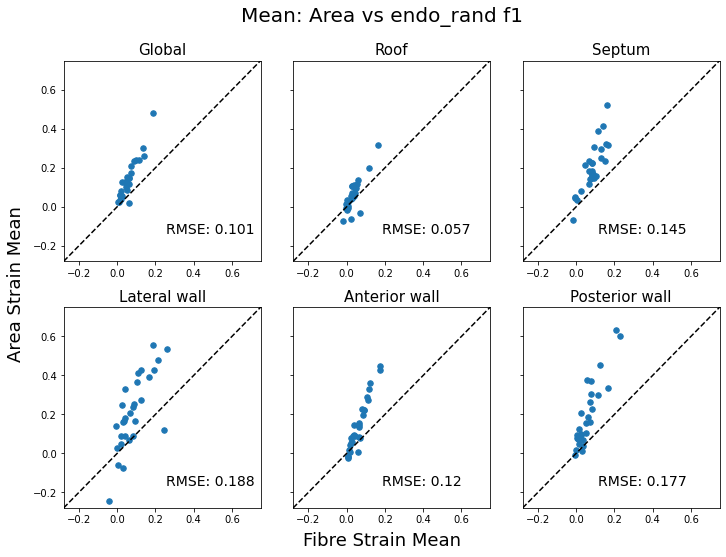

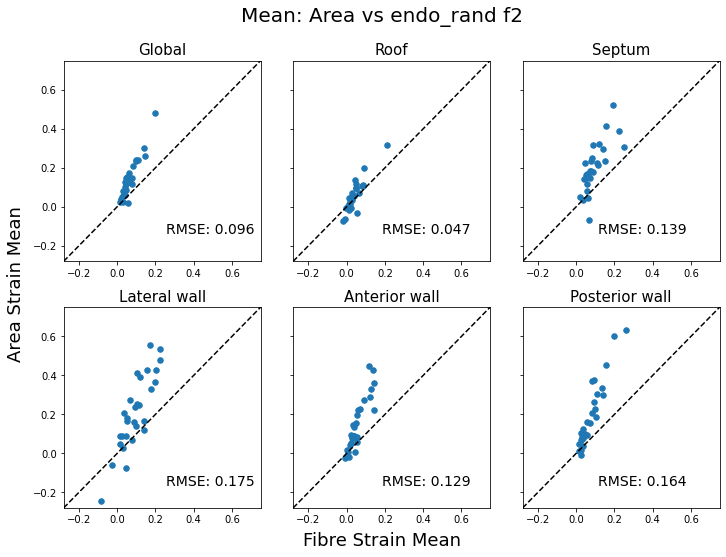

In [103]:
## Scatter plots

## Choose fiber architecture to plot for
arch_ind = 0
comp_ind = 0

for arch_ind in range(0, len(fib_arch_list)):
    print("FIBRE ARCH: ", fib_arch_list[arch_ind])

    for comp_ind in range(0,2):
        print("Fibre Strain Component: ", components[comp_ind])

        ## Calculate pearson r coeff and rmse
        pearsonr_glob = stats.pearsonr(fib_mean[:, arch_ind, comp_ind], area_mean[:])
        pearsonr_reg = np.zeros((5,))

        RMSE_glob = mean_squared_error(fib_mean[:, arch_ind, comp_ind], area_mean[:], 
                                       squared=False)
        RMSE_reg = np.zeros((5,))

#         print(f"Global:\t\tr:\t{np.round(pearsonr_glob[0],3)}\trmse:\t{np.round(RMSE_glob, 3)}")

        for i in range(0, 5):
            pearsonr_reg[i] = stats.pearsonr(fib_reg_mean[:, i, arch_ind, comp_ind], 
                                         area_reg_mean[:, i])[0]
            RMSE_reg[i] = mean_squared_error(fib_reg_mean[:, i, arch_ind, comp_ind], 
                                         area_reg_mean[:, i], squared=False)

#             print(f"Region: {regions[i]}",
#                  f"\tr:\t{np.round(pearsonr_reg[i],3)}",
#                  f"\trmse:\t{np.round(RMSE_reg[i],3)}")

        ## Plotting Scatter plots

        fig, ((ax1, ax2, ax3), 
              (ax4, ax5, ax6)) = plt.subplots(2,3,figsize=(10,7), 
                                    facecolor='white', sharey=True)

        ax1.scatter(fib_mean[:, arch_ind, comp_ind], area_mean[:], label="Global",s=30, alpha=1.0)
        for i in range(0, len(regions)):

            fig.axes[i+1].scatter(fib_reg_mean[:, i, arch_ind, comp_ind], area_reg_mean[:, i], s=30, alpha=1.0)

        titles = ["Global", "Roof", "Septum", "Lateral wall", "Anterior wall", "Posterior wall"]

        for i in range(0, len(fig.axes)):
            fig.axes[i].plot(np.arange(-0.28,1,0.1), np.arange(-0.28,1,0.1), ls='--', c='black')
            fig.axes[i].set_ylim(-0.28, 0.75)
            fig.axes[i].set_xlim(-0.28, 0.75)
            fig.axes[i].set_title(titles[i], fontsize=15)

        plt.tight_layout()
        fig.text(-0.02, 0.5, "Area Strain Mean",
                 va='center', rotation='vertical', fontsize=18)
        fig.text(0.5, -0.02, "Fibre Strain Mean", 
                 ha='center', fontsize=18)
        fig.text(0.5, 1.02, f"Mean: Area vs {fib_arch_list[arch_ind]} {components[comp_ind]}", 
                 ha='center', fontsize=20)

        fig.text(0.2, 0.6, f"RMSE: {np.round(RMSE_glob, 3)}", fontsize=14)
        fig.text(0.5, 0.6, f"RMSE: {np.round(RMSE_reg[0], 3)}", fontsize=14)
        fig.text(0.8, 0.6, f"RMSE: {np.round(RMSE_reg[1], 3)}", fontsize=14)
        fig.text(0.2, 0.1, f"RMSE: {np.round(RMSE_reg[2], 3)}", fontsize=14)
        fig.text(0.5, 0.1, f"RMSE: {np.round(RMSE_reg[3], 3)}", fontsize=14)
        fig.text(0.8, 0.1, f"RMSE: {np.round(RMSE_reg[4], 3)}", fontsize=14)

#         plt.savefig(f"/home/csi20/Dropbox/phd/Documents/P1/figures/fiber_strains/{fib_arch_list[arch_ind]}/mean_area-{components[comp_ind]}.png",
#                    dpi=200, bbox_inches="tight")

FIBRE ARCH:  endo_1
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_2
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_3
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_4
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_5
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_6
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_7
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_avg
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_l
Fibre Strain Component:  f1
Fibre Strain Component:  f2
FIBRE ARCH:  endo_rand
Fibre Strain Component:  f1
Fibre Strain Component:  f2


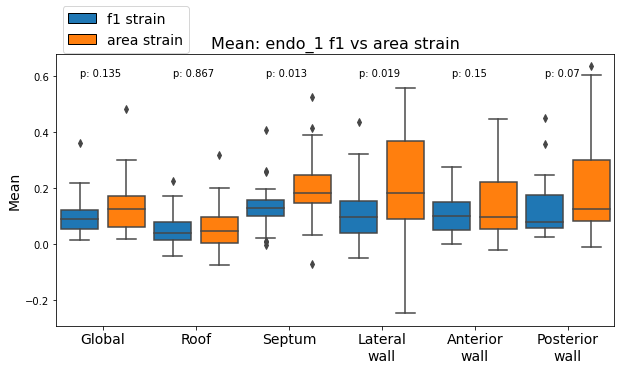

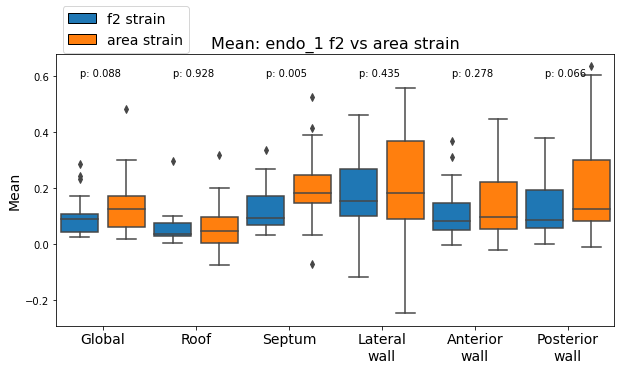

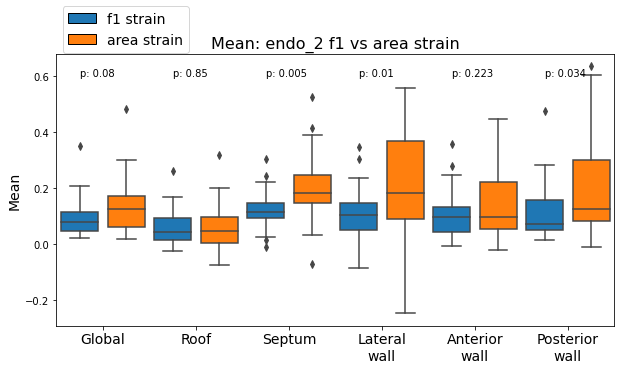

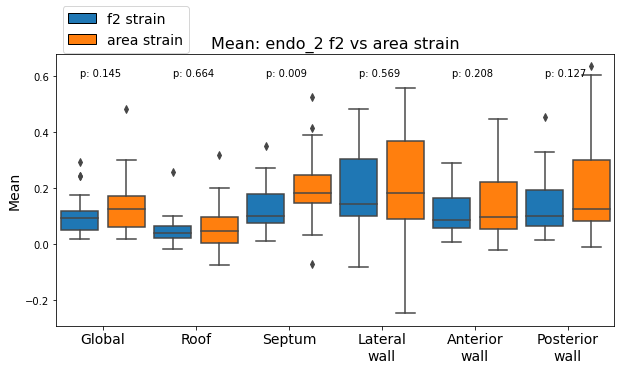

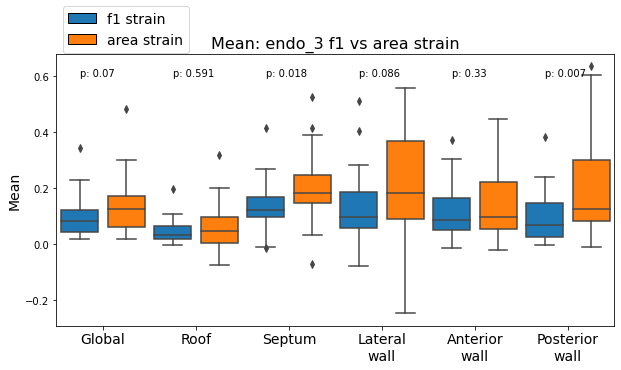

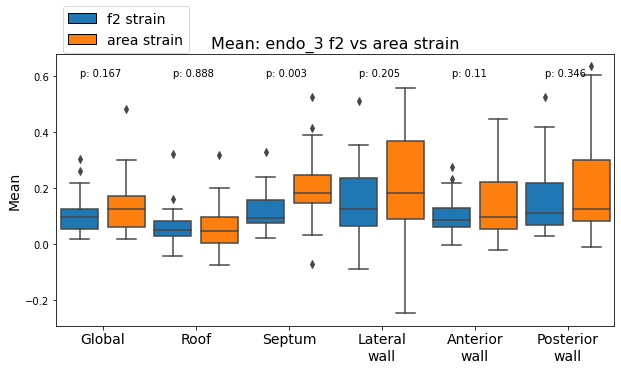

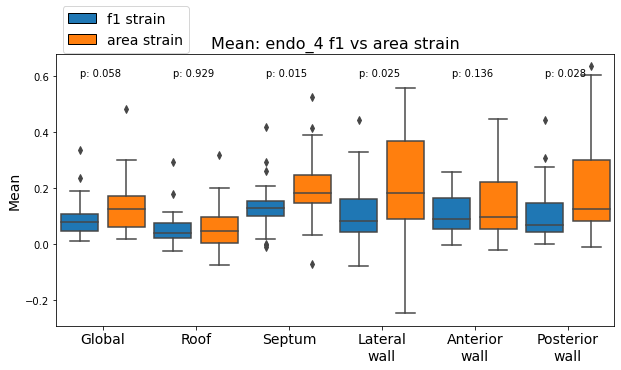

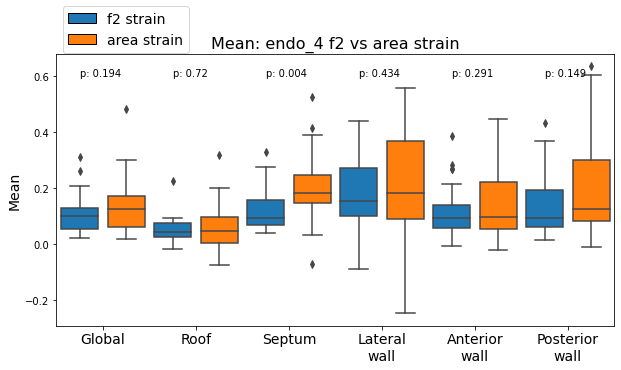

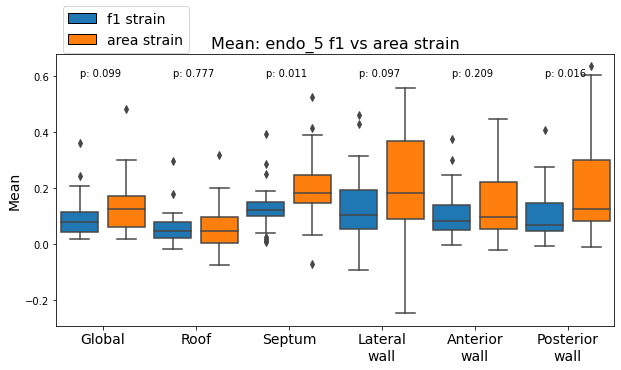

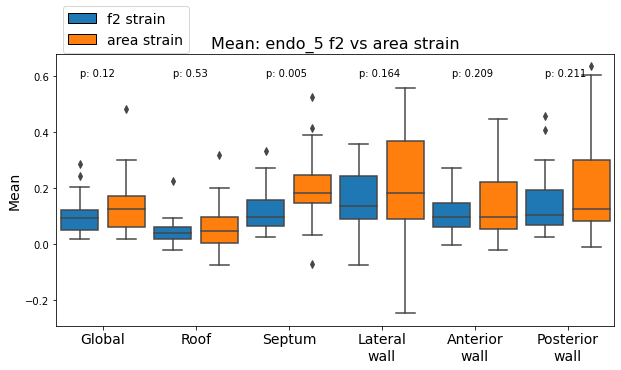

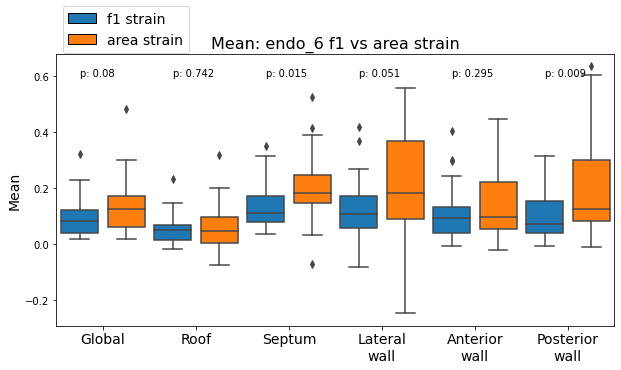

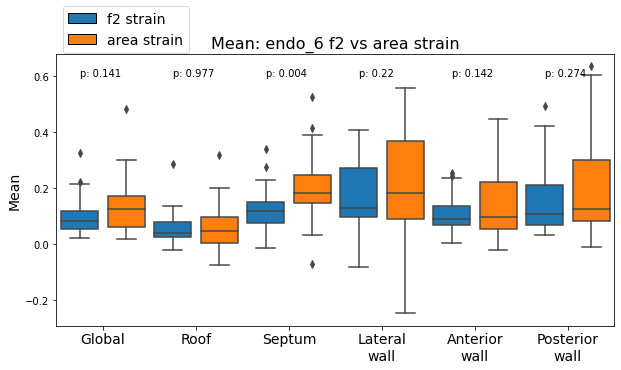

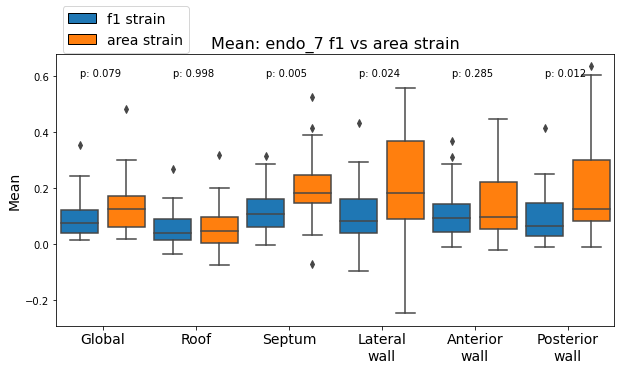

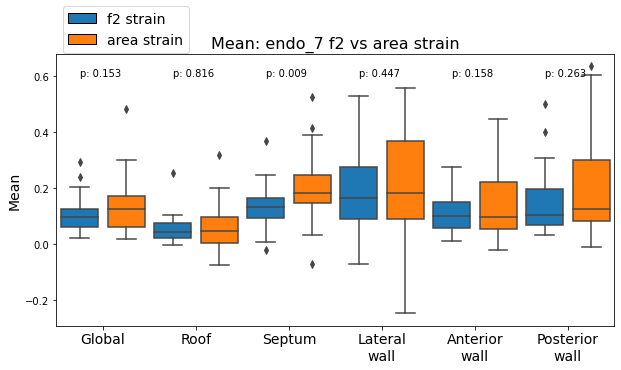

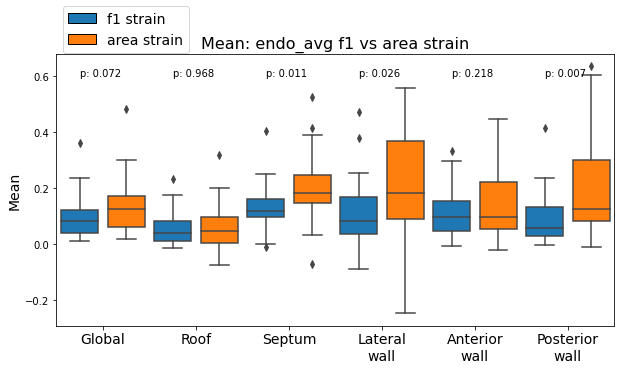

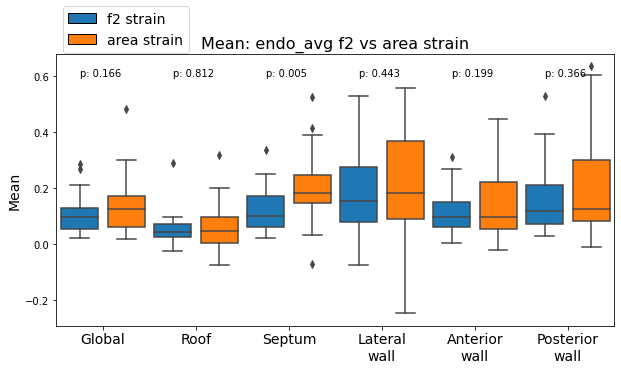

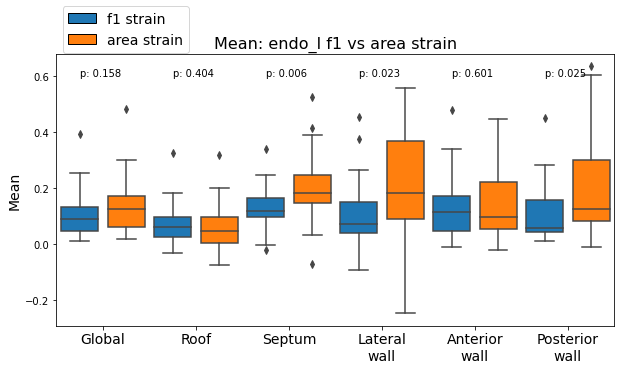

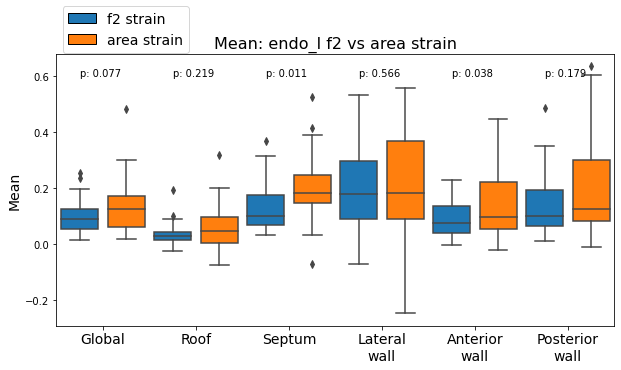

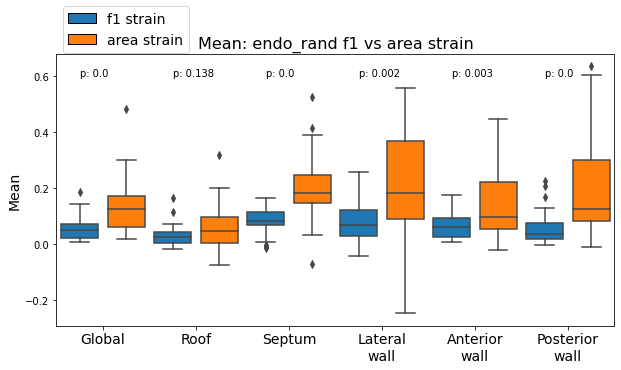

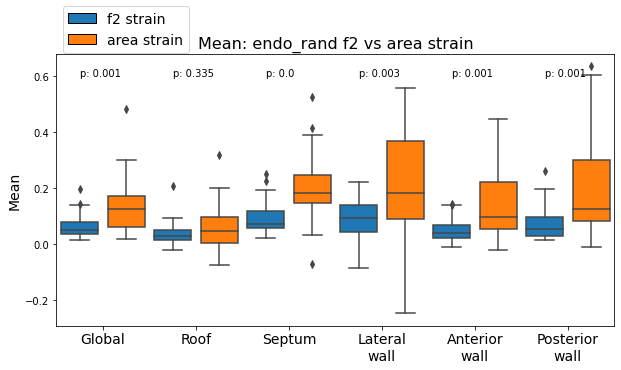

In [112]:
## Boxplots 

for arch_ind in range(0, len(fib_arch_list)):
    print("FIBRE ARCH: ", fib_arch_list[arch_ind])
    
    for comp_ind in range(0, len(components)):    
        print("Fibre Strain Component: ", components[comp_ind])

        ## calc pvals

        p_vals = np.zeros((6,))
        p_vals[0] = stats.ttest_ind(fib_mean[:, arch_ind, comp_ind], area_mean[:])[-1]

        for i in range(0, len(regions)):
            p_vals[i+1]=stats.ttest_ind(fib_reg_mean[:, i, arch_ind, comp_ind], area_reg_mean[:, i])[-1]

        fig, ((ax1)) = plt.subplots(1,1,figsize=(10,5), facecolor='white')

        data_to_plot = [fib_mean[:, arch_ind, comp_ind], area_mean[:],
                        fib_reg_mean[:, 0, arch_ind, comp_ind], area_reg_mean[:, 0],
                        fib_reg_mean[:, 1, arch_ind, comp_ind], area_reg_mean[:, 1],
                        fib_reg_mean[:, 2, arch_ind, comp_ind], area_reg_mean[:, 2],
                        fib_reg_mean[:, 3, arch_ind, comp_ind], area_reg_mean[:, 3],
                        fib_reg_mean[:, 4, arch_ind, comp_ind], area_reg_mean[:, 4]]

        sns.boxplot(data=data_to_plot, ax=ax1)

        for i in range(0, 12, 2):
            mybox = ax1.patches[i]
            mybox.set_facecolor('tab:blue')

        for i in range(1, 13, 2):
            mybox = ax1.patches[i]
            mybox.set_facecolor('tab:orange')

        legend_elements = [Patch(facecolor='tab:blue', edgecolor='black',
                                 label=f'{components[comp_ind]} strain'),
                           Patch(facecolor='tab:orange', edgecolor='black',
                                 label='area strain')]
        ax1.legend(handles=legend_elements, bbox_to_anchor=(0.25, 1.2), fontsize=14)

        ax1.set_ylabel("Mean", fontsize=14)

        regions_axis=['Global', 'Roof', 'Septum', 'Lateral\nwall', 'Anterior\nwall', 'Posterior\nwall']
        ax1.set_xticks(ticks=np.arange(0.5,11.5,2))
        ax1.set_xticklabels(regions_axis, fontsize=14)

        plt.title(f"Mean: {fib_arch_list[arch_ind]} {components[comp_ind]} vs area strain", fontsize=16)

        for i in range(0, p_vals.shape[0]):
            plt.text(2*i, 0.6, f"p: {np.round(p_vals[i], 3)}")

#         plt.savefig(f"/home/csi20/Dropbox/phd/Documents/P1/figures/fiber_strains/{fib_arch_list[arch_ind]}/mean_boxplot_area-{components[comp_ind]}.png",
#                    dpi=200, bbox_inches="tight")

## f1 vs f2

FIBER ARCH:  endo_avg


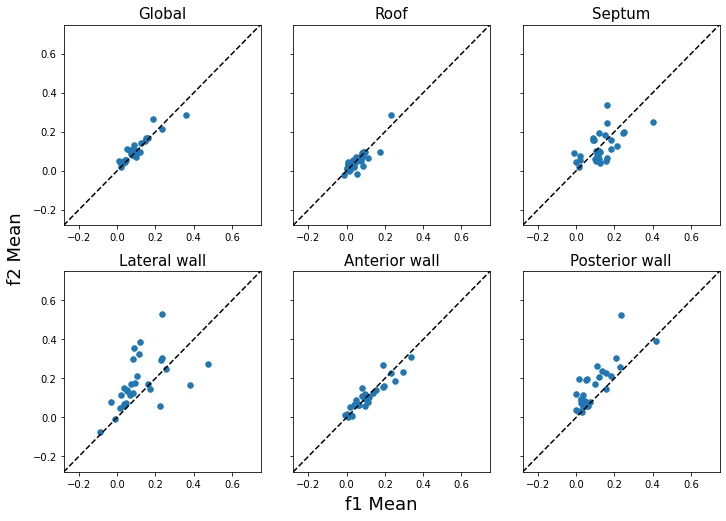

In [186]:
for arch_ind in [-3]:
    print("FIBER ARCH: ", fib_arch_list[arch_ind])

    ## Calculate pearson r coeff and RMSE

    pearsonr_glob = stats.pearsonr(fib_mean[:, arch_ind, 1], fib_mean[:, arch_ind, 0])
    pearsonr_reg = np.zeros((5,))

    RMSE_glob = mean_squared_error(fib_mean[:, arch_ind, 1], fib_mean[:, arch_ind, 0], 
                                   squared=False)
    RMSE_reg = np.zeros((5,))

#     print(f"Global:\t\tr:\t{np.round(pearsonr_glob[0],3)}\trmse:\t{np.round(RMSE_glob, 3)}")

    for i in range(0, 5):
        pearsonr_reg[i] = stats.pearsonr(fib_reg_mean[:, i, arch_ind, 1], 
                                     fib_reg_mean[:, i, arch_ind, 0])[0]
        RMSE_reg[i] = mean_squared_error(fib_reg_mean[:, i, arch_ind, 1], 
                                     fib_reg_mean[:, i, arch_ind, 0], squared=False)

#         print(f"Region: {regions[i]}",
#              f"\tr:\t{np.round(pearsonr_reg[i],3)}",
#              f"\trmse:\t{np.round(RMSE_reg[i],3)}")

    ## Plotting mean Dev

    fig, ((ax1, ax2, ax3), 
          (ax4, ax5, ax6)) = plt.subplots(2,3,figsize=(10,7), 
                                facecolor='white', sharey=True)

    ax1.scatter(fib_mean[:, arch_ind, 0], fib_mean[:, arch_ind, 1], label="Global",s=30, alpha=1.0)

    for i in range(0, len(regions)):
        fig.axes[i+1].scatter(fib_reg_mean[:, i, arch_ind, 0], fib_reg_mean[:, i, arch_ind, 1],s=30, alpha=1.0)

    titles = ["Global", "Roof", "Septum", "Lateral wall", "Anterior wall", "Posterior wall"]
    for i in range(0, len(fig.axes)):
                fig.axes[i].plot(np.arange(-0.28,1,0.1), np.arange(-0.28,1,0.1), ls='--', c='black')
                fig.axes[i].set_ylim(-0.28, 0.75)
                fig.axes[i].set_xlim(-0.28, 0.75)
                fig.axes[i].set_title(titles[i], fontsize=15)

    plt.tight_layout()
    fig.text(-0.02, 0.5, "f2 Mean",
             va='center', rotation='vertical', fontsize=18)
    fig.text(0.5, -0.02, "f1 Mean", 
             ha='center', fontsize=18)

#     fig.text(0.2, 0.6, f"RMSE: {np.round(RMSE_glob, 3)}", fontsize=14)
#     fig.text(0.5, 0.6, f"RMSE: {np.round(RMSE_reg[0], 3)}", fontsize=14)
#     fig.text(0.8, 0.6, f"RMSE: {np.round(RMSE_reg[1], 3)}", fontsize=14)
#     fig.text(0.2, 0.1, f"RMSE: {np.round(RMSE_reg[2], 3)}", fontsize=14)
#     fig.text(0.5, 0.1, f"RMSE: {np.round(RMSE_reg[3], 3)}", fontsize=14)
#     fig.text(0.8, 0.1, f"RMSE: {np.round(RMSE_reg[4], 3)}", fontsize=14)

    fig.text(0.5, 1.02, f"Mean: {fib_arch_list[arch_ind]} f1 vs {fib_arch_list[arch_ind]} f2", 
             ha='center', fontsize=20)

#     plt.savefig(f"/home/csi20/Dropbox/phd/Documents/P1/figures/fiber_strains/{fib_arch_list[arch_ind]}/mean_f1-f2_noRMSE.png",
#                dpi=200, bbox_inches="tight")

FIBER ARCH:  endo_1
FIBER ARCH:  endo_2
FIBER ARCH:  endo_3
FIBER ARCH:  endo_4
FIBER ARCH:  endo_5
FIBER ARCH:  endo_6
FIBER ARCH:  endo_7
FIBER ARCH:  endo_avg
FIBER ARCH:  endo_l
FIBER ARCH:  endo_rand


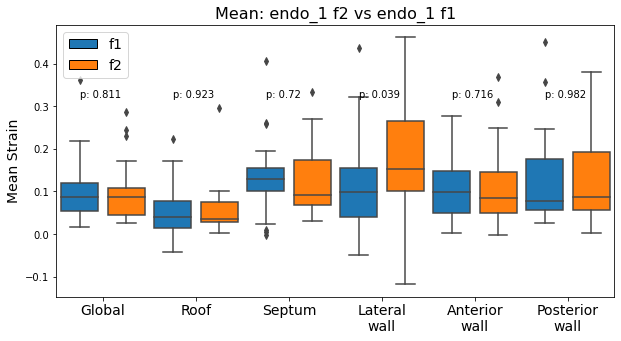

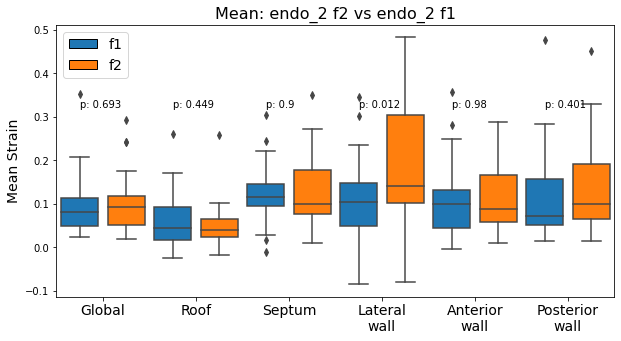

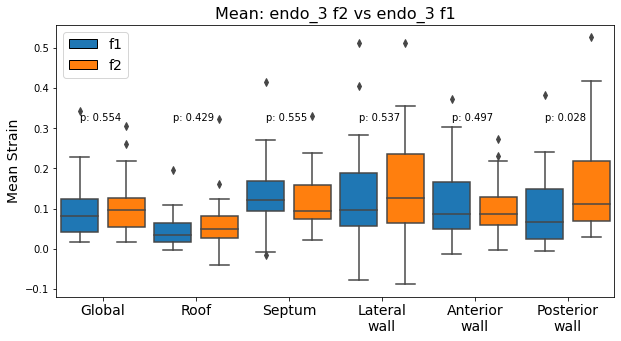

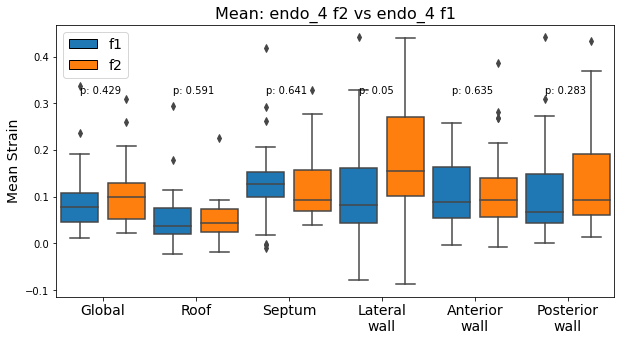

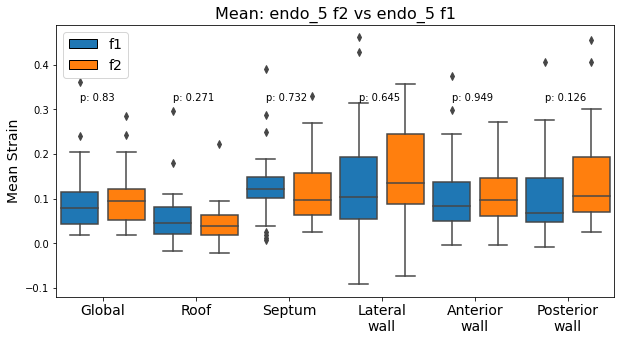

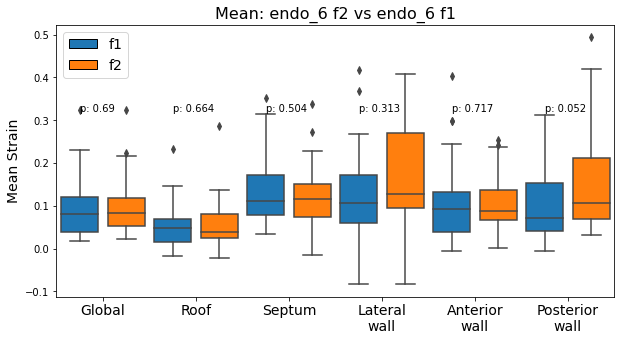

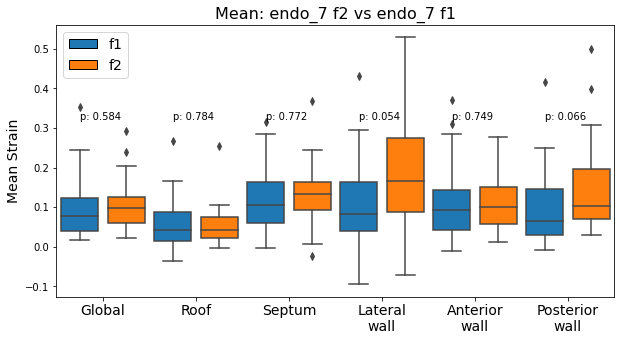

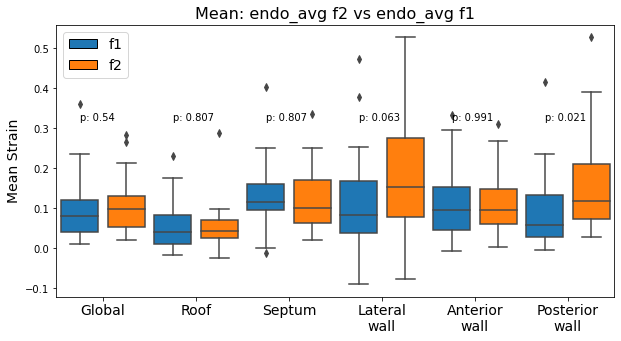

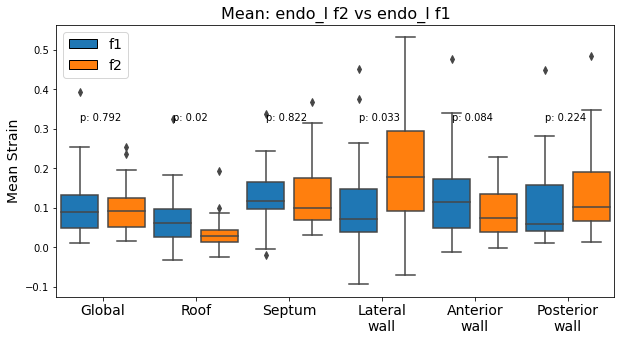

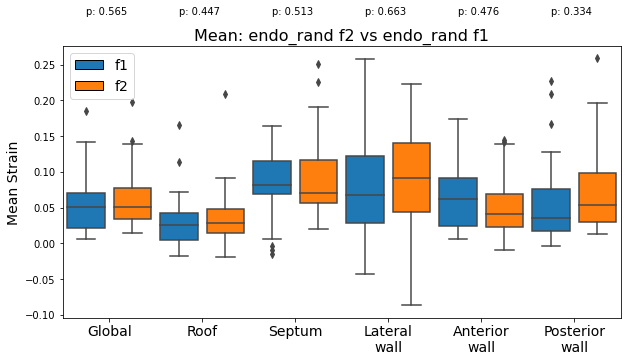

In [119]:
## Boxplots 

for arch_ind in range(0, len(fib_arch_list)):
    print("FIBER ARCH: ", fib_arch_list[arch_ind])

    ## Calculate p vals

    p_vals = np.zeros((6,))
    p_vals[0] = stats.ttest_ind(fib_mean[:, arch_ind, 0], fib_mean[:, arch_ind, 1])[-1]

    for i in range(0, len(regions)):
        ## indexing as follows: p_vals; region; f1 component
        p_vals[i+1]=stats.ttest_ind(fib_reg_mean[:, i, arch_ind, 0], fib_reg_mean[:, i, arch_ind, 1])[-1]

    p_vals

    ## Plot Boxplots

    fig, ((ax1)) = plt.subplots(1,1,figsize=(10,5), facecolor='white')

    data_to_plot = [fib_mean[:, arch_ind, 0], fib_mean[:, arch_ind, 1],
                    fib_reg_mean[:, 0, arch_ind, 0], fib_reg_mean[:, 0, arch_ind, 1],
                    fib_reg_mean[:, 1, arch_ind, 0], fib_reg_mean[:, 1, arch_ind, 1],
                    fib_reg_mean[:, 2, arch_ind, 0], fib_reg_mean[:, 2, arch_ind, 1],
                    fib_reg_mean[:, 3, arch_ind, 0], fib_reg_mean[:, 3, arch_ind, 1],
                    fib_reg_mean[:, 4, arch_ind, 0], fib_reg_mean[:, 4, arch_ind, 1]]

    sns.boxplot(data=data_to_plot, ax=ax1)

    for i in range(0, 12, 2):
        mybox = ax1.patches[i]
        mybox.set_facecolor('tab:blue')

    for i in range(1, 13, 2):
        mybox = ax1.patches[i]
        mybox.set_facecolor('tab:orange')

    legend_elements = [Patch(facecolor='tab:blue', edgecolor='black',
                             label='f1'),
                       Patch(facecolor='tab:orange', edgecolor='black',
                             label='f2')]
    ax1.legend(handles=legend_elements, loc='upper left', fontsize=14)

    ax1.set_ylabel("Mean Strain", fontsize=14)

    regions_axis=['Global', 'Roof', 'Septum', 'Lateral\nwall', 'Anterior\nwall', 'Posterior\nwall']
    ax1.set_xticks(ticks=np.arange(0.5,11.5,2))
    ax1.set_xticklabels(regions_axis, fontsize=14)

    for i in range(0, p_vals.shape[0]):
        plt.text(2*i, 0.32, f"p: {np.round(p_vals[i], 3)}")

    plt.title(f"Mean: {fib_arch_list[arch_ind]} f2 vs {fib_arch_list[arch_ind]} f1", fontsize=16)

#     plt.savefig(f"/home/csi20/Dropbox/phd/Documents/P1/figures/fiber_strains/{fib_arch_list[arch_ind]}/mean_boxplot_f1-f2.png",
#                dpi=200, bbox_inches="tight")

Comments:
* Regions where f1 strain is lower than f2 strain are:
    * Lateral Wall (not significant)
    * Posterior Wall (significant!)

## P1 Figs

In [131]:
fib_reg_mean.shape

(29, 5, 10, 2)

In [130]:
fib_arch_list[-3]

'endo_avg'

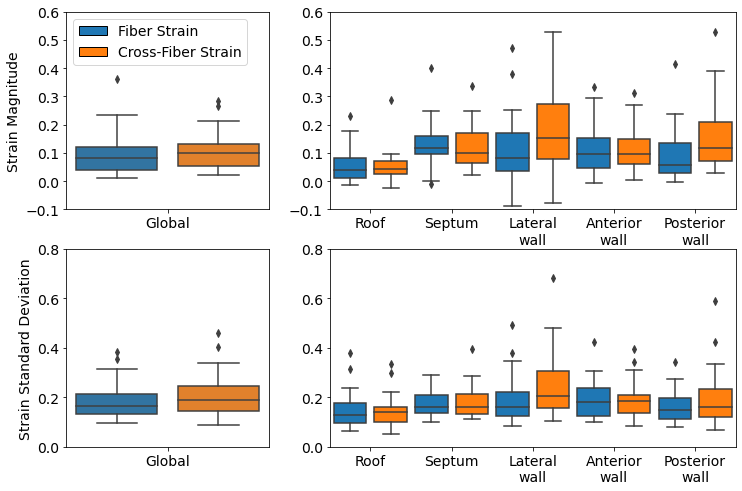

In [182]:
fig, ((ax1, ax2), 
      (ax3, ax4)) = plt.subplots(2,2,figsize=(12,8), facecolor='white', gridspec_kw={'width_ratios': [1, 2]})

ax1_data = [fib_mean[:, -3, 0], fib_mean[:, -3, 1]]

ax2_data = [fib_reg_mean[:, 0, -3, 0], fib_reg_mean[:, 0, -3, 1],
            fib_reg_mean[:, 1, -3, 0], fib_reg_mean[:, 1, -3, 1],
            fib_reg_mean[:, 2, -3, 0], fib_reg_mean[:, 2, -3, 1],
            fib_reg_mean[:, 3, -3, 0], fib_reg_mean[:, 3, -3, 1],
            fib_reg_mean[:, 4, -3, 0], fib_reg_mean[:, 4, -3, 1]]

ax3_data = [fib_std[:, -3, 0], fib_std[:, -3, 1]]

ax4_data = [fib_reg_std[:, 0, -3, 0], fib_reg_std[:, 0, -3, 1],
            fib_reg_std[:, 1, -3, 0], fib_reg_std[:, 1, -3, 1],
            fib_reg_std[:, 2, -3, 0], fib_reg_std[:, 2, -3, 1],
            fib_reg_std[:, 3, -3, 0], fib_reg_std[:, 3, -3, 1],
            fib_reg_std[:, 4, -3, 0], fib_reg_std[:, 4, -3, 1],]

sns.boxplot(data=ax1_data, ax=ax1)
sns.boxplot(data=ax2_data, ax=ax2)
sns.boxplot(data=ax3_data, ax=ax3)
sns.boxplot(data=ax4_data, ax=ax4)

ax1.set_ylim(-0.1, 0.6)
ax2.set_ylim(-0.1, 0.6)

ax3.set_ylim(0.0, 0.8)
ax4.set_ylim(0.0, 0.8)

ax1.set_ylabel("Strain Magnitude", fontsize=14)
ax3.set_ylabel("Strain Standard Deviation", fontsize=14)


for i in range(0, 10, 2):
    mybox = ax2.patches[i]
    mybox.set_facecolor('tab:blue')

for i in range(1, 11, 2):
    mybox = ax2.patches[i]
    mybox.set_facecolor('tab:orange')
    
for i in range(0, 10, 2):
    mybox = ax4.patches[i]
    mybox.set_facecolor('tab:blue')

for i in range(1, 11, 2):
    mybox = ax4.patches[i]
    mybox.set_facecolor('tab:orange')
    
legend_elements = [Patch(facecolor='tab:blue', edgecolor='black',
                         label='Fiber Strain'),
                   Patch(facecolor='tab:orange', edgecolor='black',
                         label='Cross-Fiber Strain')]
ax1.legend(handles=legend_elements, loc='upper left', fontsize=14)

regions_axis=['Roof', 'Septum', 'Lateral\nwall', 'Anterior\nwall', 'Posterior\nwall']

# ax1.set_ylabel(f"f{component+1} Fibre strain range [%]", fontsize=20)
ax1.set_xticks(ticks=np.arange(0.5,1.5,2))
ax1.set_xticklabels(["Global"], fontsize=14)

ax2.set_xticks(ticks=np.arange(0.5,9.5,2))
ax2.set_xticklabels(regions_axis, fontsize=14)

ax3.set_xticks(ticks=np.arange(0.5,1.5,2))
ax3.set_xticklabels(["Global"], fontsize=14)

ax4.set_xticks(ticks=np.arange(0.5,9.5,2))
ax4.set_xticklabels(regions_axis, fontsize=14)

# plt.tight_layout()

# We change the fontsize of minor ticks label 
ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax3.tick_params(axis='both', which='major', labelsize=14)
ax4.tick_params(axis='both', which='major', labelsize=14)

# ax.tick_params(axis='both', which='minor', labelsize=8)

# plt.savefig("/home/csi20/Dropbox/phd/Documents/P1/figures/fib_strain_boxplots_1.png", dpi=200, bbox_inches="tight")